# Step 2-2 (prokka edition)

I have created fasta files for each genome (on first stage separately for plasmids and chromosomes, on the second I have merged ones from the same organism).

It's need to create protein_fasta folder before executing the code.

In [ ]:
for source in set(C_psittaci_df1["p_c_unity"]):
    subset = C_psittaci_df1[C_psittaci_df1["p_c_unity"] == source]
    with open ("/content/sample_data/protein_fasta2/C_psittaci" + str(source) + ".fasta", "w") as protein_fasta:
        for iloc_number in range(len(subset)):
            if subset.iloc[iloc_number, 4] != "pseudogene":
                protein_fasta.write(">")
                protein_fasta.write(subset.iloc[iloc_number, 0])
                protein_fasta.write("_")
                protein_fasta.write(subset.iloc[iloc_number, 1])
                protein_fasta.write("\n")
                protein_fasta.write(subset.iloc[iloc_number, 3])
                protein_fasta.write("\n")

In [ ]:
!tar -czvf /content/protein_fasta2.tar.gz /content/sample_data/protein_fasta2/*
files.download('/content/protein_fasta2.tar.gz')

# Step 3-3 (prokka edition)

For this block of investigation I used proteinortho version 6.1.7

I used below-writed command to start proteinortho. It was default-nearly, because I was still not sure, which values I need to use for some options.
```bash
proteinortho6.pl --project=c_psittaci2 ./protein_fasta2/*.fasta --cpus=7 --debug --selfblast --singles --identity=75
```

For reading dataframe in R I have used

```R
c_psit2 <- read.csv("./c_psittaci2.proteinortho.tsv", sep = "\t")
View(c_psit2)
```

# Step 4-2 (prokka edition)

## Day 8 (21.01.23)

#### Uploading data

On the next stage I need to download file with ortologus rows in the system. I have mounted google drive with project files (in the future I'm going to use GitHub for these purposes). 

In [ ]:
# Uploading first dataframe
orto_rows = pd.read_csv("/content/gdrive/MyDrive/Start_codons/C_psittaci/c_psittaci2.proteinortho.tsv", sep="\t")
orto_rows

,# Species,Genes,Alg.-Conn.,C_psittaci0.fasta,C_psittaci1.fasta,C_psittaci10.fasta,C_psittaci11.fasta,C_psittaci12.fasta,C_psittaci13.fasta,C_psittaci14.fasta,...,C_psittaci24.fasta,C_psittaci25.fasta,C_psittaci26.fasta,C_psittaci3.fasta,C_psittaci4.fasta,C_psittaci5.fasta,C_psittaci6.fasta,C_psittaci7.fasta,C_psittaci8.fasta,C_psittaci9.fasta
0,27,27,@1001753656:0.857,LHGFNDIL_00815_C_psittaci0_2,HPPHJPLJ_00327_C_psittaci1_2,ABCIADBM_00821_C_psittaci10_2,OCODBOIF_00833_C_psittaci11_1,NOFANGPI_00820_C_psittaci12_2,BOBCKKPM_00877_C_psittaci13_2,GJMILKHJ_00838_C_psittaci14_2,...,LJFGHCCO_00825_C_psittaci24_1,DJCFFFIC_00824_C_psittaci25_1,FNJFGMEA_00821_C_psittaci26_2,MDDJMGGI_00364_C_psittaci3_1,GNHKCLDJ_00819_C_psittaci4_2,LJOCDAOG_00816_C_psittaci5_2,FHODEMCA_00334_C_psittaci6_2,DHACBPEG_00820_C_psittaci7_2,NKLFFEBA_00823_C_psittaci8_2,JBALKFGE_00822_C_psittaci9_2
1,27,27,@1001801200:0.903,LHGFNDIL_00396_C_psittaci0_2,HPPHJPLJ_00932_C_psittaci1_2,ABCIADBM_00400_C_psittaci10_2,OCODBOIF_00400_C_psittaci11_1,NOFANGPI_00394_C_psittaci12_2,BOBCKKPM_00422_C_psittaci13_2,GJMILKHJ_00408_C_psittaci14_2,...,LJFGHCCO_00398_C_psittaci24_1,DJCFFFIC_00400_C_psittaci25_1,FNJFGMEA_00399_C_psittaci26_2,MDDJMGGI_01044_C_psittaci3_1,GNHKCLDJ_00400_C_psittaci4_2,LJOCDAOG_00398_C_psittaci5_2,FHODEMCA_00946_C_psittaci6_2,DHACBPEG_00399_C_psittaci7_2,NKLFFEBA_00400_C_psittaci8_2,JBALKFGE_00400_C_psittaci9_2
2,27,27,@100184320:0.879,LHGFNDIL_00772_C_psittaci0_2,HPPHJPLJ_00283_C_psittaci1_2,ABCIADBM_00776_C_psittaci10_2,OCODBOIF_00786_C_psittaci11_1,NOFANGPI_00771_C_psittaci12_2,BOBCKKPM_00829_C_psittaci13_2,GJMILKHJ_00792_C_psittaci14_2,...,LJFGHCCO_00780_C_psittaci24_1,DJCFFFIC_00779_C_psittaci25_1,FNJFGMEA_00776_C_psittaci26_2,MDDJMGGI_00315_C_psittaci3_1,GNHKCLDJ_00776_C_psittaci4_2,LJOCDAOG_00773_C_psittaci5_2,FHODEMCA_00291_C_psittaci6_2,DHACBPEG_00777_C_psittaci7_2,NKLFFEBA_00778_C_psittaci8_2,JBALKFGE_00777_C_psittaci9_2
3,27,27,@1010586856:0.875,LHGFNDIL_01019_C_psittaci0_2,HPPHJPLJ_00532_C_psittaci1_2,ABCIADBM_01023_C_psittaci10_2,OCODBOIF_01039_C_psittaci11_1,NOFANGPI_01028_C_psittaci12_2,BOBCKKPM_01099_C_psittaci13_2,GJMILKHJ_01047_C_psittaci14_2,...,LJFGHCCO_01029_C_psittaci24_1,DJCFFFIC_01028_C_psittaci25_1,FNJFGMEA_01025_C_psittaci26_2,MDDJMGGI_00581_C_psittaci3_1,GNHKCLDJ_01023_C_psittaci4_2,LJOCDAOG_01020_C_psittaci5_2,FHODEMCA_00539_C_psittaci6_2,DHACBPEG_01023_C_psittaci7_2,NKLFFEBA_01027_C_psittaci8_2,JBALKFGE_01026_C_psittaci9_2
4,27,27,@1012147256:0.532,LHGFNDIL_00124_C_psittaci0_2,HPPHJPLJ_00662_C_psittaci1_2,ABCIADBM_00124_C_psittaci10_2,OCODBOIF_00125_C_psittaci11_1,NOFANGPI_00124_C_psittaci12_2,BOBCKKPM_00127_C_psittaci13_2,GJMILKHJ_00126_C_psittaci14_2,...,LJFGHCCO_00124_C_psittaci24_1,DJCFFFIC_00124_C_psittaci25_1,FNJFGMEA_00124_C_psittaci26_2,MDDJMGGI_00724_C_psittaci3_1,GNHKCLDJ_00124_C_psittaci4_2,LJOCDAOG_00124_C_psittaci5_2,FHODEMCA_00669_C_psittaci6_2,DHACBPEG_00124_C_psittaci7_2,NKLFFEBA_00124_C_psittaci8_2,JBALKFGE_00124_C_psittaci9_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,1,1,0,*,*,*,*,*,*,*,...,*,DJCFFFIC_00290_C_psittaci25_1,*,*,*,*,*,*,*,*
1528,1,1,0,*,*,*,*,*,*,*,...,*,DJCFFFIC_00425_C_psittaci25_1,*,*,*,*,*,*,*,*
1529,1,1,0,*,*,*,*,*,*,*,...,*,DJCFFFIC_00726_C_psittaci25_1,*,*,*,*,*,*,*,*
1530,1,1,0,*,HPPHJPLJ_00095_C_psittaci1_2,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*


### With paralog-contained orto-rows (but without paragos properly) and singletons

In [ ]:
C_psittaci_df1 = pd.read_csv("/content/gdrive/MyDrive/Start_codons/C_psittaci/C_psittaci_all_data2_new.csv")
C_psittaci_df1

,id,source,n_sequence,aa_sequence,type_of_the_gene,type_of_DNA_source,start_codone,product,cog,p_c_unity,...,C,G,E,F,H,I,P,Q,R,S
0,IPOIGHDF_00001,C_psittaci0_1,GTGGTAGACTTTGCAACTTTAGGTGGTAGACTTTTGGTTGAAAAAA...,MVDFATLGGRLLVEKNLDCARLVHYKILRLSMSGLSHHHKSRLFLT...,gene,chromosome,GTG,hypothetical protein,absent,0,...,0,0,0,0,0,0,0,0,0,1
1,IPOIGHDF_00002,C_psittaci0_1,GTGAGTAAATTAACTAAAGAAGCATCCGCTTTTTTTCAAAAGAATC...,MSKLTKEASAFFQKNQENTTKEFLKKEFAMDVFSVSLSDIEKEQIE...,gene,chromosome,GTG,hypothetical protein,absent,0,...,0,0,0,0,0,0,0,0,0,1
2,IPOIGHDF_00003,C_psittaci0_1,GTGAAAACGCTAGCATTTTGTTCTTTTAAAGGTGGTACTGGGAAAA...,MKTLAFCSFKGGTGKTTLSLNIGSNLAQVSRKKVLLVDLDPQANLT...,gene,chromosome,GTG,Sporulation initiation inhibitor protein Soj,COG1192,0,...,0,0,0,0,0,0,0,0,0,0
3,IPOIGHDF_00004,C_psittaci0_1,GTGGTTTTATATGAAAAAATCATACGTCTATTTACTGGAGAGATTA...,MVLYEKIIRLFTGEIMNDKQNMTNDFIKIVKDVEKDFPELDIKMKV...,gene,chromosome,GTG,hypothetical protein,absent,0,...,0,0,0,0,0,0,0,0,0,1
4,IPOIGHDF_00005,C_psittaci0_1,ATGGGTAATTCTGGTTTTTACTTAAATGACACCCAAAATTGTGTAT...,MGNSGFYLNDTQNCVFADNIKLGQMESPLQDQQLILGTKSTPTAAK...,gene,chromosome,ATG,Virulence plasmid protein pGP3-D,absent,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27330,JBALKFGE_01027,C_psittaci9_2,ATGCTTACGGATAAAATTATATTATTTGTTACCGAAGACAGTAGTA...,MLTDKIILFVTEDSSISLQLKEFAQNVEYNIVVSSTLTDTPEADLI...,gene,chromosome,ATG,Atypical response regulator protein ChxR,absent,9,...,0,0,0,0,0,0,0,0,0,1
27331,JBALKFGE_01028,C_psittaci9_2,ATGATACTTGCATCTGTTTTATTTTCCCCCGAAGATTTTTCTTTTC...,MILASVLFSPEDFSFPELITEAYYTWDILALIDRKLSTHVFSGIHG...,gene,chromosome,ATG,Bifunctional protein GlmU,absent,9,...,0,0,0,0,0,0,0,0,0,1
27332,JBALKFGE_01029,C_psittaci9_2,ATGGTCGTTATGGATATTTTCGAAGCTTACCGCGTAATGATAGAAA...,MVVMDIFEAYRVMIETGIEDSLDEFGPKGFSIRAPVEYALTSGGKR...,gene,chromosome,ATG,Farnesyl diphosphate synthase,absent,9,...,0,0,0,0,0,0,0,0,0,1
27333,JBALKFGE_01031,C_psittaci9_2,ATGAAAAACCTTATCGATAATAACTTAGTGAGATTTAAAAATATTT...,MKNLIDNNLVRFKNISKTKQGIFVNFKVRGEKGGASFTASIAVDIE...,gene,chromosome,ATG,hypothetical protein,absent,9,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Creating ortorows numbers
orto_rows = orto_rows.rename(columns = {"# Species": "Strains"})
orto_rows["ortologus_row"] = orto_rows.index + 1
# Uploading first csv-table and creating a new column in it
orto_rows_list = orto_rows.index
C_psittaci_df1 = pd.read_csv("/content/gdrive/MyDrive/Start_codons/C_psittaci/C_psittaci_all_data2_new.csv")
C_psittaci_df1["ortologus_row"] = 0
# Filling orto_row column (sounds like an oxymoron)
organism = "Chlamydia psittaci"
for strain in set(C_psittaci_df1["p_c_unity"]):
    maskstring = f"C_psittaci{strain}.fasta"   
    orrow = orto_rows.loc[:, maskstring].str[:14]
    for index in orto_rows_list:
        C_psittaci_df1.loc[C_psittaci_df1[C_psittaci_df1["id"] == orrow[index]].index, "ortologus_row"] = index + 1

In [ ]:
#Number of the paralogs
sum(orto_rows.query("Genes > Strains").Genes) - sum(orto_rows.query("Genes > Strains").Strains)

65

In [ ]:
set(map(lambda x: len(x), orto_rows.loc[:, "C_psittaci0.fasta"])) # Cheching for uniformity

{1, 28}

In [ ]:
C_psittaci_df1

,id,source,n_sequence,aa_sequence,type_of_the_gene,type_of_DNA_source,start_codone,product,cog,p_c_unity,...,G,E,F,H,I,P,Q,R,S,ortologus_row
0,IPOIGHDF_00001,C_psittaci0_1,GTGGTAGACTTTGCAACTTTAGGTGGTAGACTTTTGGTTGAAAAAA...,MVDFATLGGRLLVEKNLDCARLVHYKILRLSMSGLSHHHKSRLFLT...,gene,chromosome,GTG,hypothetical protein,absent,0,...,0,0,0,0,0,0,0,0,1,980
1,IPOIGHDF_00002,C_psittaci0_1,GTGAGTAAATTAACTAAAGAAGCATCCGCTTTTTTTCAAAAGAATC...,MSKLTKEASAFFQKNQENTTKEFLKKEFAMDVFSVSLSDIEKEQIE...,gene,chromosome,GTG,hypothetical protein,absent,0,...,0,0,0,0,0,0,0,0,1,984
2,IPOIGHDF_00003,C_psittaci0_1,GTGAAAACGCTAGCATTTTGTTCTTTTAAAGGTGGTACTGGGAAAA...,MKTLAFCSFKGGTGKTTLSLNIGSNLAQVSRKKVLLVDLDPQANLT...,gene,chromosome,GTG,Sporulation initiation inhibitor protein Soj,COG1192,0,...,0,0,0,0,0,0,0,0,0,979
3,IPOIGHDF_00004,C_psittaci0_1,GTGGTTTTATATGAAAAAATCATACGTCTATTTACTGGAGAGATTA...,MVLYEKIIRLFTGEIMNDKQNMTNDFIKIVKDVEKDFPELDIKMKV...,gene,chromosome,GTG,hypothetical protein,absent,0,...,0,0,0,0,0,0,0,0,1,978
4,IPOIGHDF_00005,C_psittaci0_1,ATGGGTAATTCTGGTTTTTACTTAAATGACACCCAAAATTGTGTAT...,MGNSGFYLNDTQNCVFADNIKLGQMESPLQDQQLILGTKSTPTAAK...,gene,chromosome,ATG,Virulence plasmid protein pGP3-D,absent,0,...,0,0,0,0,0,0,0,0,1,970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27330,JBALKFGE_01027,C_psittaci9_2,ATGCTTACGGATAAAATTATATTATTTGTTACCGAAGACAGTAGTA...,MLTDKIILFVTEDSSISLQLKEFAQNVEYNIVVSSTLTDTPEADLI...,gene,chromosome,ATG,Atypical response regulator protein ChxR,absent,9,...,0,0,0,0,0,0,0,0,1,718
27331,JBALKFGE_01028,C_psittaci9_2,ATGATACTTGCATCTGTTTTATTTTCCCCCGAAGATTTTTCTTTTC...,MILASVLFSPEDFSFPELITEAYYTWDILALIDRKLSTHVFSGIHG...,gene,chromosome,ATG,Bifunctional protein GlmU,absent,9,...,0,0,0,0,0,0,0,0,1,82
27332,JBALKFGE_01029,C_psittaci9_2,ATGGTCGTTATGGATATTTTCGAAGCTTACCGCGTAATGATAGAAA...,MVVMDIFEAYRVMIETGIEDSLDEFGPKGFSIRAPVEYALTSGGKR...,gene,chromosome,ATG,Farnesyl diphosphate synthase,absent,9,...,0,0,0,0,0,0,0,0,1,69
27333,JBALKFGE_01031,C_psittaci9_2,ATGAAAAACCTTATCGATAATAACTTAGTGAGATTTAAAAATATTT...,MKNLIDNNLVRFKNISKTKQGIFVNFKVRGEKGGASFTASIAVDIE...,gene,chromosome,ATG,hypothetical protein,absent,9,...,0,0,0,0,0,0,0,0,1,419


In [ ]:
# Compiling data about start-codons of ortologus rows
start_codon_per_row = {}
for string in range(len(C_psittaci_df1)):
    current_number = C_psittaci_df1.iloc[string, 36]
    if current_number > 0:    # not for paralogs
        if current_number in start_codon_per_row:
            start_codon_per_row[current_number].append(C_psittaci_df1.iloc[string, 6])
        else:
            start_codon_per_row[current_number] = [C_psittaci_df1.iloc[string, 6]]
    #else:
        #print("Current number =", current_number)
orr = []
orr_start_list = []
for key, value in start_codon_per_row.items():
    orr.append(key)
    orr_start_list.append(value)
start_codons = pd.DataFrame(
    {
        "ortologus_row": pd.Series(orr),
        "start_codons": pd.Series(orr_start_list),
        "ATG": 0.0,
        "GTG": 0.0,
        "TTG": 0.0,
        #"Other_codons": 0.0,   There are no arhistart-codons in prokka 
    }
)
# Computing frequencies of exact start-codons
start_codons.sort_values("ortologus_row", inplace=True)
for row in range(len(start_codons)):
    freqs = pd.Series(start_codons["start_codons"][row]).value_counts() # If it will be need to visualize percents, use normalize=True in brackets
    rowlength = len(start_codons["start_codons"][row])
    if "ATG" in freqs:
        start_codons["ATG"][row] = freqs["ATG"]
    else:
        start_codons["ATG"][row] = 0
    if "GTG" in freqs:
        start_codons["GTG"][row] = freqs["GTG"]
    else:
        start_codons["GTG"][row] = 0
    if "TTG" in freqs:
        start_codons["TTG"][row] = freqs["TTG"]
    else:
        start_codons["TTG"][row] = 0
    #if sum([start_codons["ATG"][row], start_codons["GTG"][row], start_codons["TTG"][row]]) < rowlength:   There are no arhistart-codons in prokka
    #    start_codons["Other_codons"][row] = rowlength - sum([start_codons["ATG"][row], start_codons["GTG"][row], start_codons["TTG"][row]])
start_codons

<ipython-input-6-14ea5dde6e11>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_codons["ATG"][row] = freqs["ATG"]
<ipython-input-6-14ea5dde6e11>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_codons["GTG"][row] = freqs["GTG"]
<ipython-input-6-14ea5dde6e11>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_codons["TTG"][row] = freqs["TTG"]
<ipython-input-6-14ea5dde6e11>:35: SettingWithCopyWarning: 
A value is tryin

,ortologus_row,start_codons,ATG,GTG,TTG
788,1,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",27.0,0.0,0.0
386,2,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",27.0,0.0,0.0
747,3,"[ATG, ATG, GTG, ATG, ATG, ATG, GTG, ATG, GTG, ...",22.0,5.0,0.0
984,4,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",27.0,0.0,0.0
123,5,"[GTG, GTG, GTG, GTG, GTG, GTG, GTG, GTG, GTG, ...",0.0,27.0,0.0
...,...,...,...,...,...
1431,1528,[ATG],1.0,0.0,0.0
1432,1529,[ATG],1.0,0.0,0.0
1433,1530,[ATG],1.0,0.0,0.0
1059,1531,[ATG],1.0,0.0,0.0


In [ ]:
# Computing uniformity of start-codon per ortologus row
start_codons["uniformity"] = "NA"
for row in range(len(start_codons)):
    if len(set(start_codons.iloc[row, 1])) == 1:
        start_codons.iloc[row, 5] = "uniform"
    else:
        start_codons.iloc[row, 5] = "non-uniform"
start_codons

,ortologus_row,start_codons,ATG,GTG,TTG,uniformity
788,1,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",27.0,0.0,0.0,uniform
386,2,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",27.0,0.0,0.0,uniform
747,3,"[ATG, ATG, GTG, ATG, ATG, ATG, GTG, ATG, GTG, ...",22.0,5.0,0.0,non-uniform
984,4,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",27.0,0.0,0.0,uniform
123,5,"[GTG, GTG, GTG, GTG, GTG, GTG, GTG, GTG, GTG, ...",0.0,27.0,0.0,uniform
...,...,...,...,...,...,...
1431,1528,[ATG],1.0,0.0,0.0,uniform
1432,1529,[ATG],1.0,0.0,0.0,uniform
1433,1530,[ATG],1.0,0.0,0.0,uniform
1059,1531,[ATG],1.0,0.0,0.0,uniform


In [ ]:
start_codons2 = start_codons.merge(orto_rows, on="ortologus_row", how="outer")
start_codons2

,ortologus_row,start_codons,ATG,GTG,TTG,uniformity,Strains,Genes,Alg.-Conn.,C_psittaci0.fasta,...,C_psittaci24.fasta,C_psittaci25.fasta,C_psittaci26.fasta,C_psittaci3.fasta,C_psittaci4.fasta,C_psittaci5.fasta,C_psittaci6.fasta,C_psittaci7.fasta,C_psittaci8.fasta,C_psittaci9.fasta
0,1,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",27.0,0.0,0.0,uniform,27,27,@1001753656:0.857,LHGFNDIL_00815_C_psittaci0_2,...,LJFGHCCO_00825_C_psittaci24_1,DJCFFFIC_00824_C_psittaci25_1,FNJFGMEA_00821_C_psittaci26_2,MDDJMGGI_00364_C_psittaci3_1,GNHKCLDJ_00819_C_psittaci4_2,LJOCDAOG_00816_C_psittaci5_2,FHODEMCA_00334_C_psittaci6_2,DHACBPEG_00820_C_psittaci7_2,NKLFFEBA_00823_C_psittaci8_2,JBALKFGE_00822_C_psittaci9_2
1,2,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",27.0,0.0,0.0,uniform,27,27,@1001801200:0.903,LHGFNDIL_00396_C_psittaci0_2,...,LJFGHCCO_00398_C_psittaci24_1,DJCFFFIC_00400_C_psittaci25_1,FNJFGMEA_00399_C_psittaci26_2,MDDJMGGI_01044_C_psittaci3_1,GNHKCLDJ_00400_C_psittaci4_2,LJOCDAOG_00398_C_psittaci5_2,FHODEMCA_00946_C_psittaci6_2,DHACBPEG_00399_C_psittaci7_2,NKLFFEBA_00400_C_psittaci8_2,JBALKFGE_00400_C_psittaci9_2
2,3,"[ATG, ATG, GTG, ATG, ATG, ATG, GTG, ATG, GTG, ...",22.0,5.0,0.0,non-uniform,27,27,@100184320:0.879,LHGFNDIL_00772_C_psittaci0_2,...,LJFGHCCO_00780_C_psittaci24_1,DJCFFFIC_00779_C_psittaci25_1,FNJFGMEA_00776_C_psittaci26_2,MDDJMGGI_00315_C_psittaci3_1,GNHKCLDJ_00776_C_psittaci4_2,LJOCDAOG_00773_C_psittaci5_2,FHODEMCA_00291_C_psittaci6_2,DHACBPEG_00777_C_psittaci7_2,NKLFFEBA_00778_C_psittaci8_2,JBALKFGE_00777_C_psittaci9_2
3,4,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",27.0,0.0,0.0,uniform,27,27,@1010586856:0.875,LHGFNDIL_01019_C_psittaci0_2,...,LJFGHCCO_01029_C_psittaci24_1,DJCFFFIC_01028_C_psittaci25_1,FNJFGMEA_01025_C_psittaci26_2,MDDJMGGI_00581_C_psittaci3_1,GNHKCLDJ_01023_C_psittaci4_2,LJOCDAOG_01020_C_psittaci5_2,FHODEMCA_00539_C_psittaci6_2,DHACBPEG_01023_C_psittaci7_2,NKLFFEBA_01027_C_psittaci8_2,JBALKFGE_01026_C_psittaci9_2
4,5,"[GTG, GTG, GTG, GTG, GTG, GTG, GTG, GTG, GTG, ...",0.0,27.0,0.0,uniform,27,27,@1012147256:0.532,LHGFNDIL_00124_C_psittaci0_2,...,LJFGHCCO_00124_C_psittaci24_1,DJCFFFIC_00124_C_psittaci25_1,FNJFGMEA_00124_C_psittaci26_2,MDDJMGGI_00724_C_psittaci3_1,GNHKCLDJ_00124_C_psittaci4_2,LJOCDAOG_00124_C_psittaci5_2,FHODEMCA_00669_C_psittaci6_2,DHACBPEG_00124_C_psittaci7_2,NKLFFEBA_00124_C_psittaci8_2,JBALKFGE_00124_C_psittaci9_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,1528,[ATG],1.0,0.0,0.0,uniform,1,1,0,*,...,*,DJCFFFIC_00290_C_psittaci25_1,*,*,*,*,*,*,*,*
1528,1529,[ATG],1.0,0.0,0.0,uniform,1,1,0,*,...,*,DJCFFFIC_00425_C_psittaci25_1,*,*,*,*,*,*,*,*
1529,1530,[ATG],1.0,0.0,0.0,uniform,1,1,0,*,...,*,DJCFFFIC_00726_C_psittaci25_1,*,*,*,*,*,*,*,*
1530,1531,[ATG],1.0,0.0,0.0,uniform,1,1,0,*,...,*,*,*,*,*,*,*,*,*,*


In [ ]:
strain_gene_row = start_codons2[["Strains", "Genes", "ortologus_row", "uniformity", "ATG", "GTG", "TTG"]]   # Other codons deleted
summary_rows = C_psittaci_df1.merge(strain_gene_row, on="ortologus_row")
# summary rows hasn't paralogs and pseudogenes
#summary_rows["start_type"] = summary_rows["start_codone"]   We haven't arhistart-codons
#popular = ["ATG", "GTG", "TTG"]
#for number in range(len(summary_rows)):
#    if summary_rows.iloc[number, 19] not in popular:
#        summary_rows.iloc[number, 19] = "Other"
summary_rows

,id,source,n_sequence,aa_sequence,type_of_the_gene,type_of_DNA_source,start_codone,product,cog,p_c_unity,...,Q,R,S,ortologus_row,Strains,Genes,uniformity,ATG,GTG,TTG
0,IPOIGHDF_00001,C_psittaci0_1,GTGGTAGACTTTGCAACTTTAGGTGGTAGACTTTTGGTTGAAAAAA...,MVDFATLGGRLLVEKNLDCARLVHYKILRLSMSGLSHHHKSRLFLT...,gene,chromosome,GTG,hypothetical protein,absent,0,...,0,0,1,980,19,19,non-uniform,3.0,14.0,2.0
1,FJJJKCLJ_00001,C_psittaci10_1,GTGGTAGACTTTGCAACTTTAGGTGGTAGACTTTTGGTTGAAAAAA...,MVDFATLGGRLLVEKNLDCARLVHYKILRLSMSGLSHHHKSRLFLT...,gene,chromosome,GTG,hypothetical protein,absent,10,...,0,0,1,980,19,19,non-uniform,3.0,14.0,2.0
2,DDPNAMMK_00007,C_psittaci1_1,GTGGTAGACTTTGCAACTTTAGGTGGTAGACTTTTGGTTGAAAAAA...,MVDFATLGGRLLVEKNLDCARLVHYKILRLSMSGLSHHHKSRLFLT...,gene,chromosome,GTG,hypothetical protein,absent,1,...,0,0,1,980,19,19,non-uniform,3.0,14.0,2.0
3,CMNEINFE_00006,C_psittaci13_1,GTGGTAGACTTTGCAACTTTAGGTGGTAGACTTTTGGTTGAAAAAA...,MVDFATLGGRLLVEKNLDCARLVHYKILRLSMSGLSHHHKSRLFLT...,gene,chromosome,GTG,hypothetical protein,absent,13,...,0,0,1,980,19,19,non-uniform,3.0,14.0,2.0
4,EJODMOHP_00007,C_psittaci14_1,GTGGTAGACTTTGCAACTTTAGGTGGTAGACTTTTGGTTGAAAAAA...,MVDFATLGGRLLVEKNLDCARLVHYKILRLSMSGLSHHHKSRLFLT...,gene,chromosome,GTG,hypothetical protein,absent,14,...,0,0,1,980,19,19,non-uniform,3.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27265,FHODEMCA_00839,C_psittaci6_2,TTGAATGATACAAATAGTAAATGTAGCATAACAGCGAATCTCGGAG...,MNDTNSKCSITANLGDIIFDGNKIITTSDRSSPDVKRNSIDLGSGK...,gene,chromosome,TTG,putative outer membrane protein pmp10,absent,6,...,0,0,1,1506,1,1,uniform,0.0,0.0,1.0
27266,FHODEMCA_00840,C_psittaci6_2,GTGTGTATCTCCTATGCAGGTAAAAGCTCTCCTCTAAAAACAAGTT...,MCISYAGKSSPLKTSCFSETTGNLSFIGNGYTLCFDNITTEDSNPG...,gene,chromosome,GTG,putative outer membrane protein pmp2,absent,6,...,0,0,1,1507,1,1,uniform,0.0,1.0,0.0
27267,FHODEMCA_00841,C_psittaci6_2,ATGAAACATCCAGTCTACTGGTTTTTAATGTCCTCGAGCCTATTGG...,MKHPVYWFLMSSSLLASHSLGFAEEVQTTLTPSDSYNGNTASSDFE...,gene,chromosome,ATG,hypothetical protein,absent,6,...,0,0,1,1508,1,1,uniform,1.0,0.0,0.0
27268,FHODEMCA_00843,C_psittaci6_2,GTGACTATACCTGATAGCAATCCAACAAATTATGTTCCCCCTACTC...,MTIPDSNPTNYVPPTHYGYQGNWTLAWAPGGEGNTQTATLTWENTG...,gene,chromosome,GTG,putative outer membrane protein pmp10,absent,6,...,0,0,1,1509,1,1,uniform,0.0,1.0,0.0


#### Saving summary-rows and start-codons2

In [ ]:
summary_rows.to_csv("summary_rows_prokka.csv", index=False)

In [ ]:
start_codons2.to_csv("start_codons2_prokka.csv", index=False)

## Day 24 (09.02.23)

### Uniformity and number of full-non-canonical genes

In [ ]:
summary_rows.columns

Index(['id', 'source', 'n_sequence', 'aa_sequence', 'type_of_the_gene',
       'type_of_DNA_source', 'start_codone', 'protein_id', 'product', 'cog',
       'p_c_unity', 'additional_info', 'ortologus_row', 'Strains', 'Genes',
       'uniformity', 'ATG', 'GTG', 'TTG'],
      dtype='object')

In [ ]:
summary_rows.query("uniformity == 'uniform' and start_codone != 'ATG'")

,id,source,n_sequence,aa_sequence,type_of_the_gene,type_of_DNA_source,start_codone,product,cog,p_c_unity,...,Q,R,S,ortologus_row,Strains,Genes,uniformity,ATG,GTG,TTG
19,IPOIGHDF_00002,C_psittaci0_1,GTGAGTAAATTAACTAAAGAAGCATCCGCTTTTTTTCAAAAGAATC...,MSKLTKEASAFFQKNQENTTKEFLKKEFAMDVFSVSLSDIEKEQIE...,gene,chromosome,GTG,hypothetical protein,absent,0,...,0,0,1,984,17,17,uniform,0.0,17.0,0.0
20,FJJJKCLJ_00008,C_psittaci10_1,GTGAGTAAATTAACTAAAGAAGCATCCGCTTTTTTTCAAAAGAATC...,MSKLTKEASAFFQKNQENTTKEFLKKEFAMDVFSVSLSDIEKEQIE...,gene,chromosome,GTG,hypothetical protein,absent,10,...,0,0,1,984,17,17,uniform,0.0,17.0,0.0
21,KCBNBBAK_00007,C_psittaci12_1,GTGAGTAAATTAACTAAAGAAGCATCCGCTTTTTTTCAAAAGAATC...,MSKLTKEASAFFQKNQENTTKEFLKKEFAMDVFSVSLSDIEKEQIE...,gene,chromosome,GTG,hypothetical protein,absent,12,...,0,0,1,984,17,17,uniform,0.0,17.0,0.0
22,CMNEINFE_00005,C_psittaci13_1,GTGAGTAAATTAACTAAAGAAGCATCCGCTTTTTTTCAAAAGAATC...,MSKLTKEASAFFQKNQENTTKEFLKKEFAMDVFSVSLSDIEKEQIE...,gene,chromosome,GTG,hypothetical protein,absent,13,...,0,0,1,984,17,17,uniform,0.0,17.0,0.0
23,FJDFGGIC_00002,C_psittaci15_1,GTGAGTAAATTAACTAAAGAAGCATCCGCTTTTTTTCAAAAGAATC...,MSKLTKEASAFFQKNQENTTKEFLKKEFAMDVFSVSLSDIEKEQIE...,gene,chromosome,GTG,hypothetical protein,absent,15,...,0,0,1,984,17,17,uniform,0.0,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27257,MDDJMGGI_01122,C_psittaci3_1,TTGCTCTCTTCCCCGCCTAAGTTATCTCAATTATGGGAAAAACGTC...,MLSSPPKLSQLWEKRRLLLRGLSVGLRKPCFSKLPHHKMSSVDLHQ...,gene,chromosome,TTG,4-hydroxybenzoate decarboxylase subunit C,COG0043,3,...,0,0,0,1237,1,1,uniform,0.0,0.0,1.0
27263,FHODEMCA_00132,C_psittaci6_2,TTGAGTAAAGAAAATATTTCTTATGGTTTGTGGAGTAAAGAAGCGA...,MSKENISYGLWSKEATFAQHDAIIVDAIGWLKQLYSAADLAFVGGT...,gene,chromosome,TTG,3-deoxy-D-manno-octulosonic acid transferase,COG1519,6,...,0,0,0,1504,1,1,uniform,0.0,0.0,1.0
27265,FHODEMCA_00839,C_psittaci6_2,TTGAATGATACAAATAGTAAATGTAGCATAACAGCGAATCTCGGAG...,MNDTNSKCSITANLGDIIFDGNKIITTSDRSSPDVKRNSIDLGSGK...,gene,chromosome,TTG,putative outer membrane protein pmp10,absent,6,...,0,0,1,1506,1,1,uniform,0.0,0.0,1.0
27266,FHODEMCA_00840,C_psittaci6_2,GTGTGTATCTCCTATGCAGGTAAAAGCTCTCCTCTAAAAACAAGTT...,MCISYAGKSSPLKTSCFSETTGNLSFIGNGYTLCFDNITTEDSNPG...,gene,chromosome,GTG,putative outer membrane protein pmp2,absent,6,...,0,0,1,1507,1,1,uniform,0.0,1.0,0.0


### COG-analysis

## Day 8 (21.01.23)

### Something unstructured.

In [ ]:
C_psittaci_df1.groupby(["type_of_DNA_source", "start_codone"]).count()

id  source  n_sequence  aa_sequence  \
type_of_DNA_source start_codone                                           
chromosome         ATG           24146   24146       24146        24146   
                   GTG            2285    2285        2285         2285   
                   TTG             904     904         904          904   

                                 type_of_the_gene  protein_id  product   cog  \
type_of_DNA_source start_codone                                                
chromosome         ATG                      24146           0    24146  8078   
                   GTG                       2285           0     2285   863   
                   TTG                        904           0      904   329   

                                 p_c_unity  additional_info  ortologus_row  
type_of_DNA_source start_codone                                             
chromosome         ATG               24146            24146          24146  
                   GTG                2285             2285           2285  
                   TTG                 904              904            904

In [ ]:
C_psittaci_df1.groupby(["start_codone", "type_of_DNA_source"]).count().to_csv("C.psittaci_scdistribution_BS_new.csv")

In [ ]:
C_psittaci_df1.query("type_of_DNA_source == 'plasmid' and start_codone != 'ATG'").groupby("type_of_the_gene").count()

NameError: ignored

### Distributions in different groups of genes




I need to visualize start-codons' distribution of three gene groups: common (100% frequency) widespread (30-70% with wider rounding) and singletons.

In [ ]:
# Defining indices of three groups
max_genes = len(set(C_psittaci_df1["p_c_unity"]))
middle_genes_lower = int(0.3 * max_genes)
middle_genes_upper = math.ceil(0.7 * max_genes)
max_genes_indices = orto_rows[orto_rows["Strains"] == max_genes].index + 1
middle_genes_indices = orto_rows[(orto_rows["Strains"] >= middle_genes_lower) & (orto_rows["Strains"] <= middle_genes_upper)].index + 1

In [ ]:
# Adding data about gene groups into dataframe
C_psittaci_df1.loc[C_psittaci_df1[(C_psittaci_df1["ortologus_row"] > 0) & (C_psittaci_df1["ortologus_row"] <= max(max_genes_indices))].index, "gene_group"] = "maximum"
C_psittaci_df1.loc[C_psittaci_df1[(C_psittaci_df1["ortologus_row"] >= min(middle_genes_indices)) & (C_psittaci_df1["ortologus_row"] <= max(middle_genes_indices))].index, "gene_group"] = "medium"
C_psittaci_df1.loc[C_psittaci_df1[(C_psittaci_df1["ortologus_row"] == 0) & (C_psittaci_df1["type_of_the_gene"] == "gene")].index, "gene_group"] = "minimum"


In [ ]:
C_psittaci_df1

,id,source,n_sequence,aa_sequence,type_of_the_gene,type_of_DNA_source,start_codone,protein_id,product,cog,p_c_unity,additional_info,ortologus_row,gene_group
0,IPOIGHDF_00001,C_psittaci0_1,GTGGTAGACTTTGCAACTTTAGGTGGTAGACTTTTGGTTGAAAAAA...,MVDFATLGGRLLVEKNLDCARLVHYKILRLSMSGLSHHHKSRLFLT...,gene,chromosome,GTG,NaN,hypothetical protein,NaN,0,"(0, 1)",980,medium
1,IPOIGHDF_00002,C_psittaci0_1,GTGAGTAAATTAACTAAAGAAGCATCCGCTTTTTTTCAAAAGAATC...,MSKLTKEASAFFQKNQENTTKEFLKKEFAMDVFSVSLSDIEKEQIE...,gene,chromosome,GTG,NaN,hypothetical protein,NaN,0,"(0, 2)",984,medium
2,IPOIGHDF_00003,C_psittaci0_1,GTGAAAACGCTAGCATTTTGTTCTTTTAAAGGTGGTACTGGGAAAA...,MKTLAFCSFKGGTGKTTLSLNIGSNLAQVSRKKVLLVDLDPQANLT...,gene,chromosome,GTG,NaN,Sporulation initiation inhibitor protein Soj,COG:COG1192,0,"(0, 3)",979,medium
3,IPOIGHDF_00004,C_psittaci0_1,GTGGTTTTATATGAAAAAATCATACGTCTATTTACTGGAGAGATTA...,MVLYEKIIRLFTGEIMNDKQNMTNDFIKIVKDVEKDFPELDIKMKV...,gene,chromosome,GTG,NaN,hypothetical protein,NaN,0,"(0, 4)",978,medium
4,IPOIGHDF_00005,C_psittaci0_1,ATGGGTAATTCTGGTTTTTACTTAAATGACACCCAAAATTGTGTAT...,MGNSGFYLNDTQNCVFADNIKLGQMESPLQDQQLILGTKSTPTAAK...,gene,chromosome,ATG,NaN,Virulence plasmid protein pGP3-D,NaN,0,"(0, 5)",970,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27330,JBALKFGE_01027,C_psittaci9_2,ATGCTTACGGATAAAATTATATTATTTGTTACCGAAGACAGTAGTA...,MLTDKIILFVTEDSSISLQLKEFAQNVEYNIVVSSTLTDTPEADLI...,gene,chromosome,ATG,NaN,Atypical response regulator protein ChxR,NaN,9,"(46, 1027)",718,maximum
27331,JBALKFGE_01028,C_psittaci9_2,ATGATACTTGCATCTGTTTTATTTTCCCCCGAAGATTTTTCTTTTC...,MILASVLFSPEDFSFPELITEAYYTWDILALIDRKLSTHVFSGIHG...,gene,chromosome,ATG,NaN,Bifunctional protein GlmU,NaN,9,"(46, 1028)",82,maximum
27332,JBALKFGE_01029,C_psittaci9_2,ATGGTCGTTATGGATATTTTCGAAGCTTACCGCGTAATGATAGAAA...,MVVMDIFEAYRVMIETGIEDSLDEFGPKGFSIRAPVEYALTSGGKR...,gene,chromosome,ATG,NaN,Farnesyl diphosphate synthase,NaN,9,"(46, 1029)",69,maximum
27333,JBALKFGE_01031,C_psittaci9_2,ATGAAAAACCTTATCGATAATAACTTAGTGAGATTTAAAAATATTT...,MKNLIDNNLVRFKNISKTKQGIFVNFKVRGEKGGASFTASIAVDIE...,gene,chromosome,ATG,NaN,hypothetical protein,NaN,9,"(46, 1031)",419,maximum


In [ ]:
C_psittaci_df1.to_csv("/content/gdrive/MyDrive/Start_codons/C_psittaci/C_psit_up2.csv")

#### Returning to distributions

I ran below-writed code in R, because привычка -- вторая натура.

```R
max = c_psit[c_psit$gene_group == "maximum",]
med  = c_psit[c_psit$gene_group == "medium",]
min  = c_psit[c_psit$gene_group == "minimum",]
ggplot(max)+
  geom_bar(aes(x=start_codone, y = (after_stat(count))/sum(after_stat(count)), fill=start_codone))

ggplot(med)+
  geom_bar(aes(x=start_codone, y = (after_stat(count))/sum(after_stat(count)), fill=start_codone))

ggplot(min)+
  geom_bar(aes(x=start_codone, y = (after_stat(count))/sum(after_stat(count)), fill=start_codone))
```

## Day 10 (23.01.23)

### Cross-tabs (difference of all start-codons vs literature data, chromosomal vs literature data and chromosomal vs plasmid)

R code for comparing chromosomal bivariant distribution (canonical-non-canonical) with the same strains plasmids one.

```R
# Function for comparing chromosome and plasmid start-codone distribution (only for canonical or non-canonical start-codones, not exact three nucleotides)
chrome_plasm_chi_square <- function(df){
  subset_chrom <- subset(df, type_of_DNA_source == "chromosome")
  subset_plasm <- subset(df, type_of_DNA_source == "plasmid")
  chrom_table <- prop.table(table(subset_chrom$canon))
  answer <- chisq.test(table(subset_plasm$canon), p=c(chrom_table[[1]], chrom_table[[2]]))
  return(answer)
}
chrome_plasm_chi_square(c_psit)
```

Results are:
> data:  table(subset_plasm$canon)
X-squared = 117.61, df = 1, p-value < 2.2e-16

## Day 15. (28.01.23)

### Frequencies and parts

#### Without pseudogens and paralogs

In [ ]:
summary_rows.columns

Index(['id', 'source', 'n_sequence', 'aa_sequence', 'type_of_the_gene',
       'type_of_DNA_source', 'start_codone', 'protein_id', 'product', 'cog',
       'p_c_unity', 'additional_info', 'ortologus_row', 'Strains', 'Genes',
       'uniformity', 'ATG', 'GTG', 'TTG'],
      dtype='object')

In [ ]:
gene_type_part = summary_rows.gene_type.value_counts()
start_codone_part = summary_rows.start_codone.value_counts()
uniformity_part = summary_rows.uniformity.value_counts()
print(gene_type_part, type_of_the_gene_part, start_codone_part, uniformity_part)

AttributeError: ignored

# Step 5-2 (prokka edition)

### Preparing data without paralogs and pseudogenes for alignment

We need to align only rows with different start-codons.

In [ ]:
for i in summary_rows.iloc[:, 1:5]:
    print(i)

source
n_sequence
aa_sequence
type_of_the_gene


In [ ]:
non_uniform_or_list = list(set(summary_rows.query("uniformity == 'non-uniform'").ortologus_row))

In [ ]:
for orto_row in non_uniform_or_list:
    print(orto_row)

In [ ]:
for orto_row in non_uniform_or_list:
    subset = summary_rows.query("ortologus_row == @orto_row")
    with open ("/content/sample_data/non_uni2/C_psittaci_non_uni2_" + str(orto_row) + ".fasta", "w") as nucleotide_fasta:
        for iloc_number in range(len(subset)):
            nucleotide_fasta.write(">")
            nucleotide_fasta.write(subset.iloc[iloc_number, 0])
            nucleotide_fasta.write("_")
            nucleotide_fasta.write(subset.iloc[iloc_number, 1])
            nucleotide_fasta.write("\n")
            nucleotide_fasta.write(subset.iloc[iloc_number, 2])
            nucleotide_fasta.write("\n")

In [ ]:
!tar -czvf /content/nucleotide_fasta.tar.gz /content/sample_data/non_uni2/*
files.download('/content/nucleotide_fasta.tar.gz')

### Using MUSCLE

I used below writed script for aligning with MUSCLE (version 5.1).

```bash
#!/bin/bash

directory="./muscle_prokka/"
for f in $(ls ${directory}*.fasta); do
        muscle -align $f -output ${f%.fasta}.afa;
done
```

On the next step I have downloaded AliView (aliview.jar v.2021) from the [site](https://ormbunkar.se/aliview/) for viewing results of alignment. 
I have done in executable
```bash
chmod +x aliview.install.run
```
and started with super-user rights
```
sudo ./aliview.install.run
```

### Tree making

I have created fasttree venv and then have downloaded the same-name (version 2.1.11) tool from the conda.

The script for tree drawing was below (executed from parent directory):
```bash
#!/bin/bash

directory="./muscle_prokka/"
for f in $(ls ${directory}*.afa); do
        fasttree -nt ${f} > ${f%.afa}_tree;
done
```

### Statistics

It is located in R script.

### Checking for correctness of start

In [ ]:
C_psittaci_df1.query("id=='AACEENPF_00632'")

,id,source,n_sequence,aa_sequence,type_of_the_gene,type_of_DNA_source,start_codone,product,cog,p_c_unity,...,G,E,F,H,I,P,Q,R,S,ortologus_row
15817,AACEENPF_00632,C_psittaci2_2,GTGATACGCTGGCTGAAGAAACGCAATCATTATGATCAAGTACACA...,MIRWLKKRNHYDQVHKEYCEKLEVLHQDKKHTPTAGGILFFSYCYS...,gene,chromosome,GTG,hypothetical protein,absent,2,...,0,0,0,0,0,0,0,0,1,1008


# Valeria Rubinova

## **Yersinia pseudotuberculosis**

## Parsing NCBI GenBank and creating dataframe

In [ ]:
!pip3 install pandas
!pip3 install biopython

import Bio
import pandas as pd
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.SeqRecord import SeqRecord
from Bio import Entrez
from tqdm import tqdm
Entrez.email = "valeriyakudr98@gmail.com"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.8 MB/s eta 0:00:00


In [ ]:
oragnism_name = "Yersinia pseudotuberculosis"

In [ ]:
search_handle_1 = Entrez.esearch(db="assembly", term=oragnism_name)
search_record_1 = Entrez.read(search_handle_1)
count = int(search_record_1["Count"])

search_handle_2 = Entrez.esearch(db="assembly", term=oragnism_name, retmax=count)
search_record_2 = Entrez.read(search_handle_2)

In [ ]:
search_record_2

{'Count': '326', 'RetMax': '326', 'RetStart': '0', 'IdList': ['12589311', '11750391', '11696881', '11458661', '9740541', '9597841', '9597831', '9597821', '9597811', '9597801', '9597791', '9597781', '9597771', '9597761', '9597751', '9597741', '9597731', '9597721', '9071011', '4720601', '4232441', '4232421', '4232001', '4231991', '4231971', '4231961', '4231941', '4231931', '4231921', '4231901', '4231861', '4231841', '4231831', '4231821', '4231801', '4231781', '4231771', '4231761', '4231751', '4231741', '4231731', '4231721', '4231711', '4231701', '4231691', '4231681', '4231671', '4231661', '4231651', '4231641', '4231631', '4231621', '4231611', '4231601', '4231591', '4231581', '4231571', '4231561', '4231551', '4231541', '4231531', '4231521', '4231511', '4231501', '4231491', '4231481', '4231471', '4231461', '4231451', '4231441', '4231431', '4231421', '4231411', '4231401', '4231391', '4231381', '4231371', '4231361', '4231351', '4231341', '4231331', '4231321', '4231311', '4231301', '4231291',

In [ ]:
# Filtering only complete assemblies
id_list = search_record_2["IdList"]
complete_ids = []
accession_ids = [] 
all_ids = []
for ids in tqdm(id_list):
    handle = Entrez.esummary(db="assembly", id=ids, report="full")
    record = Entrez.read(handle)
    if record['DocumentSummarySet']['DocumentSummary'][0]['AssemblyStatus'] == "Complete Genome":
        complete_ids.append(ids)
        accession_ids.append(record['DocumentSummarySet']['DocumentSummary'][0]['AssemblyAccession'])
        all_ids.extend([ids, record['DocumentSummarySet']['DocumentSummary'][0]['AssemblyAccession']])

100%|██████████| 326/326 [02:02<00:00,  2.66it/s]


In [ ]:
# Function for filtering only GenBank IDs

# Function that extracts nucleotide database accessions for INSDC data from the result of an Entrez.elink() query
def extract_insdc(links):
    linkset = [ls for ls in links[0]['LinkSetDb'] if
              ls['LinkName'] == 'assembly_nuccore_insdc']
    if 0 != len(linkset): # There are INSDC UIDs
        uids = [i['Id'] for i in linkset[0]['Link']]
    else:
        uids = 0
    return uids

In [ ]:
# # Taking IDs for fetching
# links = []
# n = 0
# for complete_id in complete_ids:
#     link_handle = Entrez.elink(dbfrom="assembly", db="nucleotide", from_uid=complete_id)
#     link_record = Entrez.read(link_handle)
#     uids = extract_insdc(link_record)
#     if uids != 0:
#         #print("uids:", uids)
#         for uid in uids:
#             links.append((uid, n))
#         n += 1

In [ ]:
# Taking ids for fetching
links = []
links_check = []
n = 0
for complete_id in complete_ids:
    link_handle = Entrez.elink(dbfrom="assembly", db="nucleotide", from_uid=complete_id)
    link_record = Entrez.read(link_handle)
    uids = extract_insdc(link_record)
    if uids != 0:
        #print("uids:", uids)
        for uid in uids:
            if uid not in links_check:
                links_check.append(uid)
                links.append((uid, n))
                cumulative = 1
            else:
                cumulative = 0
        n += cumulative

In [ ]:
# Fetching
gb_records = []
for link in tqdm(links):
    gb_handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id=link[0])
    gb_record = SeqIO.read(gb_handle, 'genbank')
    gb_records.append((gb_record, link[1]))

100%|██████████| 41/41 [08:30<00:00, 12.45s/it]


In [ ]:
number = []
for rec in gb_records:
    if rec[1] == 13:
        number.append(rec[0])
print(number[1].features[1])

IndexError: ignored

In [ ]:
locus_tag = []
organism = []
nt_sequence = []
aa_sequence = []
product = []
gene_or_pseudogene = []
DNA_source = []
P_C_unity = []

for record_number in range(len(gb_records)):
    for feature_number in range(1, len(gb_records[record_number][0].features)):
        if gb_records[record_number][0].features[feature_number].type == "CDS":
            
            # Protein ID
            if 'locus_tag' in gb_records[record_number][0].features[feature_number].qualifiers.keys():
                locus_tag.append(gb_records[record_number][0].features[feature_number].qualifiers['locus_tag'][0])
            else:
                locus_tag.append("NA")
                
            # Organism
            organism.append(gb_records[record_number][0].name)
            
            # Nucleotide sequence
            first = gb_records[record_number][0].features[feature_number].location.start
            last = gb_records[record_number][0].features[feature_number].location.end
            strand = gb_records[record_number][0].features[feature_number].location.strand
            if strand == 1:
                nt_sequence.append(str(gb_records[record_number][0].seq[first:last]))
            elif strand == -1:
                nt_sequence.append(str(gb_records[record_number][0].seq.complement()[first:last])[::-1])
            else:
                nt_sequence.append("NA")
            
            # Aminoacid sequence
            if 'translation' in gb_records[record_number][0].features[feature_number].qualifiers.keys():
                aa_sequence.append(gb_records[record_number][0].features[feature_number].qualifiers['translation'][0])
            else:
                aa_sequence.append("NA")
                
            # DNA source
            if "chromosome" in gb_records[record_number][0].description:
                DNA_source.append("chromosome")
            else:
                DNA_source.append("plasmid")

            # Gene or pseudogene
            if 'pseudo' not in gb_records[record_number][0].features[feature_number].qualifiers.keys():
                gene_or_pseudogene.append("gene")
            else:
                gene_or_pseudogene.append("pseudogene")

            # Name of product
            if 'product' in gb_records[record_number][0].features[feature_number].qualifiers.keys():
                product.append(gb_records[record_number][0].features[feature_number].qualifiers['product'][0])
            else:
                product.append("NA")

            # Plasmid and chromosome
            P_C_unity.append(gb_records[record_number][1])
        

In [ ]:
start_codone = []
Yers_pseud_df = pd.DataFrame(
    {
        "ID": pd.Series(locus_tag),
        "Organism": pd.Series(organism),
        "NT_sequence": pd.Series(nt_sequence),
        "AA_sequence": pd.Series(aa_sequence),
        "Type_of_DNA_source": pd.Series(DNA_source),
        "Type_of_the_gene": pd.Series(gene_or_pseudogene),
        "Start_codone": pd.Series(start_codone),
        "Product": pd.Series(product),
        "P_C_unity": pd.Series(P_C_unity)
    }
)

for item in range(len(organism)):
    start_codone.append(Yers_pseud_df.iloc[item, 2][0:3])

<ipython-input-49-31174bb99dd7>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  "Start_codone": pd.Series(start_codone),


In [ ]:
Yers_pseud_df_full = pd.DataFrame(
    {
        "ID": pd.Series(locus_tag),
        "Organism": pd.Series(organism),
        "NT_sequence": pd.Series(nt_sequence),
        "AA_sequence": pd.Series(aa_sequence),
        "Type_of_DNA_source": pd.Series(DNA_source),
        "Type_of_the_gene": pd.Series(gene_or_pseudogene),
        "Start_codone": pd.Series(start_codone),
        "Product": pd.Series(product),
        "P_C_unity": pd.Series(P_C_unity)
    }
)

## Table 1

In [ ]:
Yers_pseud_df_full

,ID,Organism,NT_sequence,AA_sequence,Type_of_DNA_source,Type_of_the_gene,Start_codone,Product,P_C_unity
0,FOB73_00005,CP044064,TGTTTGGTATTGGTGCTGAAAGTTACACCGTGGGCTCTAACGAGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,TGT,L-rhamnose isomerase,0
1,FOB73_00010,CP044064,ATGGTTGCTATTGACCTTGGCGCGTCCAGCGGACGGATGATGCTGG...,MVAIDLGASSGRMMLASYYPGQQQLTLREVCRFTNQIKSIDGSDVW...,chromosome,gene,ATG,rhamnulokinase,0
2,FOB73_00015,CP044064,ATGTGCCGTGCAGCTTTTGGCGATGTGACTGCCGATGGTGAGCATG...,MCRAAFGDVTADGEHVDGEHVDGVGMISGLLFLNANSVEICLFDDL...,chromosome,gene,ATG,phosphoribosylaminoimidazole synthetase,0
3,FOB73_00020,CP044064,ATGACTGTATTGCACAGTATTGATTTTTTCTCTTCCAGCTCAGCAC...,MTVLHSIDFFSSSSAPVAIEARAPQSAFPEHHHDFYEIVIVEEGAG...,chromosome,gene,ATG,HTH-type transcriptional activator RhaS,0
4,FOB73_00025,CP044064,ATGCGGGCACCACTGCTGTTAGAAAGCCGGGATTATTTACTCTCGG...,MRAPLLLESRDYLLSEQMPVAVTNRYPQETFVEHTHQFCEIVIVWR...,chromosome,gene,ATG,HTH-type transcriptional activator RhaR,0
...,...,...,...,...,...,...,...,...,...
96496,YpsIP31758_A0035,CP000718,ATGAATGGATATGAACTAAGACTTTGGCGTAAAGGGCTTTCCTGGG...,MNGYELRLWRKGLSWEQERAAEELGVSRRAYQYYEKNGPPMVVILA...,plasmid,gene,ATG,hypothetical protein,23
96497,YpsIP31758_A0036,CP000718,ATGTTGGGACGTCAGAAGCAAAAATTGGTGATCAGTGAAACTGACA...,MLGRQKQKLVISETDIDTALAHLRALPYGTPFPMRWDRQHLLNLLH...,plasmid,gene,ATG,hypothetical protein,23
96498,YpsIP31758_A0037,CP000718,ATGACCTCAAAAGAAAAAAAATCATCGCTAGGACTGGATGCAATTG...,MTSKEKKSSLGLDAIGDLSSLLAGKGPSPTSPIDLDMNLIDEDPNQ...,plasmid,gene,ATG,transcription repressor protein KorB,23
96499,YpsIP31758_A0038,CP000718,ATGGGTAATGTCCATGAAAAAACGGCTCTCGAAAGCCGAGTTCCAG...,MGNVHEKTALESRVPGSHKRLGCGPTNHRYSKWCLGRGDAASNVCS...,plasmid,gene,ATG,plasmid partition protein,23


In [ ]:
Yers_pseud_df_full.to_csv("Yers_pseud_df_full.csv", index=False)

In [ ]:
import pandas as pd
Yers_pseud_df_full = pd.read_csv("drive/MyDrive/Yers_pseud_df_full.csv")

In [ ]:
Yers_pseud_df_full

,ID,Organism,NT_sequence,AA_sequence,Type_of_DNA_source,Type_of_the_gene,Start_codone,Product,P_C_unity
0,FOB73_00005,CP044064,TGTTTGGTATTGGTGCTGAAAGTTACACCGTGGGCTCTAACGAGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,TGT,L-rhamnose isomerase,0
1,FOB73_00010,CP044064,ATGGTTGCTATTGACCTTGGCGCGTCCAGCGGACGGATGATGCTGG...,MVAIDLGASSGRMMLASYYPGQQQLTLREVCRFTNQIKSIDGSDVW...,chromosome,gene,ATG,rhamnulokinase,0
2,FOB73_00015,CP044064,ATGTGCCGTGCAGCTTTTGGCGATGTGACTGCCGATGGTGAGCATG...,MCRAAFGDVTADGEHVDGEHVDGVGMISGLLFLNANSVEICLFDDL...,chromosome,gene,ATG,phosphoribosylaminoimidazole synthetase,0
3,FOB73_00020,CP044064,ATGACTGTATTGCACAGTATTGATTTTTTCTCTTCCAGCTCAGCAC...,MTVLHSIDFFSSSSAPVAIEARAPQSAFPEHHHDFYEIVIVEEGAG...,chromosome,gene,ATG,HTH-type transcriptional activator RhaS,0
4,FOB73_00025,CP044064,ATGCGGGCACCACTGCTGTTAGAAAGCCGGGATTATTTACTCTCGG...,MRAPLLLESRDYLLSEQMPVAVTNRYPQETFVEHTHQFCEIVIVWR...,chromosome,gene,ATG,HTH-type transcriptional activator RhaR,0
...,...,...,...,...,...,...,...,...,...
96496,YpsIP31758_A0035,CP000718,ATGAATGGATATGAACTAAGACTTTGGCGTAAAGGGCTTTCCTGGG...,MNGYELRLWRKGLSWEQERAAEELGVSRRAYQYYEKNGPPMVVILA...,plasmid,gene,ATG,hypothetical protein,23
96497,YpsIP31758_A0036,CP000718,ATGTTGGGACGTCAGAAGCAAAAATTGGTGATCAGTGAAACTGACA...,MLGRQKQKLVISETDIDTALAHLRALPYGTPFPMRWDRQHLLNLLH...,plasmid,gene,ATG,hypothetical protein,23
96498,YpsIP31758_A0037,CP000718,ATGACCTCAAAAGAAAAAAAATCATCGCTAGGACTGGATGCAATTG...,MTSKEKKSSLGLDAIGDLSSLLAGKGPSPTSPIDLDMNLIDEDPNQ...,plasmid,gene,ATG,transcription repressor protein KorB,23
96499,YpsIP31758_A0038,CP000718,ATGGGTAATGTCCATGAAAAAACGGCTCTCGAAAGCCGAGTTCCAG...,MGNVHEKTALESRVPGSHKRLGCGPTNHRYSKWCLGRGDAASNVCS...,plasmid,gene,ATG,plasmid partition protein,23


In [ ]:
df_non_canon_gene = Yers_pseud_df_full.query("Type_of_the_gene == 'gene' and Start_codone != 'ATG' and Start_codone != 'TTG' and Start_codone != 'GTG'")

In [ ]:
df_non_canon_gene

,ID,Organism,NT_sequence,AA_sequence,Type_of_DNA_source,Type_of_the_gene,Start_codone,Product,P_C_unity
0,FOB73_00005,CP044064,TGTTTGGTATTGGTGCTGAAAGTTACACCGTGGGCTCTAACGAGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,TGT,L-rhamnose isomerase,0
142,FOB73_00740,CP044064,ATAAATTACCATCAATACTACCCAGTCGATGTGATTAATGGCCCCG...,MNYHQYYPVDVINGPGTRCTLFVSGCVHQCVGCYNKSTWRLNSGKP...,chromosome,gene,ATA,anaerobic ribonucleoside-triphosphate reductas...,0
245,FOB73_01265,CP044064,ATATATTCTATTGAGGACAATTCAAAGGCCGAGGAATATGCCCTTT...,MYSIEDNSKAEEYALLAFVCQWICANKRRLYGRHLLRCDGAGFYQL...,chromosome,gene,ATA,DUF2575 domain-containing protein,0
350,FOB73_01790,CP044064,ATTAATACCCGTAATCACTGGCGTTATAAGCAAGCCGCAAGCAAAT...,MNTRNHWRYKQAASKWIPRSLFR,chromosome,gene,ATT,hypothetical protein,0
373,FOB73_01905,CP044064,ATTTTTACCCGAGTAGCCAATTTCTGCCGTAAGGTGCTGATCCGCG...,MFTRVANFCRKVLIREDKTVRDDKARKDKVPGEDNVARKERRPARA...,chromosome,gene,ATT,polynucleotide adenylyltransferase PcnB,0
...,...,...,...,...,...,...,...,...,...
55140,CEQ20_21900,CP031780,CTGCAAGCGTTTTATTATCCTCATGGAGGGAATGATCGGGCGCTAG...,MQAFYYPHGGNDRALGVLVQCSYLLDAGILQMKVRDNKVLVNKGLY...,chromosome,gene,CTG,DUF3757 domain-containing protein,12
55228,CEQ20_22340,CP031780,ATTAATACCCGTAATCACTGGCGTTATAAGCAAGCCGCAAGCAAAT...,MNTRNHWRYKQAASKWIPRSLFR,chromosome,gene,ATT,hypothetical protein,12
55249,CEQ20_22445,CP031780,ATTTTTACCCGAGTAGCCAATTTCTGCCGTAAGGTGCTGATCCGCG...,MFTRVANFCRKVLIREDKTVRDDKARKDKVPGEDNVARKERRPARA...,chromosome,gene,ATT,polynucleotide adenylyltransferase PcnB,12
90541,YPTB2341,BX936398,ATTAAAGGCGGAAAACGAGTTCAACCGGCGCGTCCTAATCGCATCA...,MKGGKRVQPARPNRINKEIRATEVRLTGVDGEQIGIVSLNEALEKA...,plasmid,gene,ATT,translation initiation factor IF-3,22


## Finding ortologus rows with proteinortho

In [ ]:
# 1st step of proteinortho
!proteinortho --selfblast --singles -subpara='--ignore-warnings' --identity=75 *.fasta


# Clusterization
!proteinortho_clustering myproject.blast-graph > myproject.proteinortho.tsv

### Creating fasta files

In [ ]:
Yers_pseud_df_full

In [ ]:
for source in set(Yers_pseud_df_full["P_C_unity"]):
    subset = Yers_pseud_df_full[Yers_pseud_df_full["P_C_unity"] == source]
    #with open ("drive/MyDrive/Start_Codons_Project/Yersinia_pseuvd_fasta_new/Yersinia_pseuv" + str(source) + ".fasta", "w") as protein_fasta:
    with open ("drive/MyDrive/Start_Codons_Project/Y_pseudo_fasta_full/Y_pseudo" + str(source) + ".fasta", "w") as protein_fasta: # Заменил строчку кода для своего удобства
        for iloc_number in range(len(subset)):
            if subset.iloc[iloc_number, 5] != "pseudogene":  # В исходнике было 4, но порядок колонок тут другой
                protein_fasta.write(">")
                protein_fasta.write(str(subset.iloc[iloc_number, 0]))
                protein_fasta.write("_")
                protein_fasta.write(str(subset.iloc[iloc_number, 1]))
                protein_fasta.write("\n")
                protein_fasta.write(str(subset.iloc[iloc_number, 3]))
                protein_fasta.write("\n")
# При первой загрузке потерялся 13-й файл (проверил, в сборке вообще нет генов)

In [ ]:
# Добавлен блок кода
from google.colab import files
!tar -czvf /content/protein_fasta.tar.gz /content/sample_data/protein_fasta/*
files.download('/content/protein_fasta.tar.gz')

tar: Removing leading `/' from member names
/content/sample_data/protein_fasta/Y_pestis0.fasta
tar: Removing leading `/' from hard link targets
/content/sample_data/protein_fasta/Y_pestis10.fasta
/content/sample_data/protein_fasta/Y_pestis11.fasta
/content/sample_data/protein_fasta/Y_pestis12.fasta
/content/sample_data/protein_fasta/Y_pestis14.fasta
/content/sample_data/protein_fasta/Y_pestis15.fasta
/content/sample_data/protein_fasta/Y_pestis16.fasta
/content/sample_data/protein_fasta/Y_pestis17.fasta
/content/sample_data/protein_fasta/Y_pestis18.fasta
/content/sample_data/protein_fasta/Y_pestis19.fasta
/content/sample_data/protein_fasta/Y_pestis1.fasta
/content/sample_data/protein_fasta/Y_pestis20.fasta
/content/sample_data/protein_fasta/Y_pestis21.fasta
/content/sample_data/protein_fasta/Y_pestis22.fasta
/content/sample_data/protein_fasta/Y_pestis23.fasta
/content/sample_data/protein_fasta/Y_pestis2.fasta
/content/sample_data/protein_fasta/Y_pestis3.fasta
/content/sample_data/protei

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
ortho_df_all = pd.read_csv('drive/MyDrive/myproject.proteinortho.tsv', sep='\t')

In [ ]:
ortho_df_all

In [ ]:
ortho_df_all.sort_values(by=['Alg.-Conn.'], ascending=False).head(50)

In [ ]:
ortho_df_completed = pd.read_csv('drive/MyDrive/myproject.proteinortho_24.tsv', sep='\t')

In [ ]:
ortho_df_completed[(ortho_df_completed['# Species'] ==  1) & (ortho_df_completed['Genes'] ==  1)]

,# Species,Genes,Alg.-Conn.,GCF_000016945.1_ASM1694v1_protein.faa,GCF_000047365.1_ASM4736v1_protein.faa,GCF_000750315.1_ASM75031v1_protein.faa,GCF_000834295.1_ASM83429v1_protein.faa,GCF_000834355.1_ASM83435v1_protein.faa,GCF_000834375.1_ASM83437v1_protein.faa,GCF_000834415.1_ASM83441v1_protein.faa,...,GCF_003798405.1_ASM379840v1_protein.faa,GCF_003798425.1_ASM379842v1_protein.faa,GCF_003798445.1_ASM379844v1_protein.faa,GCF_003814345.1_ASM381434v1_protein.faa,GCF_008693365.1_ASM869336v1_protein.faa,GCF_900092345.1_YP4713_protein.faa,GCF_900635715.1_32473_H02_protein.faa,GCF_900635755.1_33467_B01_protein.faa,GCF_900636705.1_43908_A02_protein.faa,GCF_900637475.1_51108_B01_protein.faa


In [ ]:
ortho_df_completed.columns[3:27]

### Rename columns (old section, it doesn't matter)

In [ ]:
for col in ortho_df_completed:
  if '.faa' in col:
    ortho_df_completed.rename({col: col.split('1_')[0]+'1'}, axis=1, inplace=True)

In [ ]:
ortho_df_completed

In [ ]:
Yers_pseud_df_full.query("Type_of_DNA_source == 'plasmid' and Start_codone != 'ATG'").groupby("Type_of_the_gene").count()

In [ ]:
Yers_pseud_df_full.groupby(["Type_of_DNA_source", "Start_codone"]).count().head(50)

In [ ]:
Yers_pseud_df_full.groupby(["Type_of_DNA_source", "Start_codone"]).count()

In [ ]:
Yers_pseud_df_full.query("Type_of_the_gene == 'gene' and Start_codone != 'ATG' and Start_codone != 'TTG' and Start_codone != 'GTG'")['Product'].value_counts().head(50)

### Checking nucleotide and aminoacid sequences:

In [ ]:
df_non_canon_gene['NT_sequence'].index

Int64Index([    0,   142,   245,   350,   373,   455,   668,   694,   704,
              962,
            ...
            54694, 54838, 54881, 54991, 55124, 55140, 55228, 55249, 90541,
            93862],
           dtype='int64', length=438)

In [ ]:
cnt_not_equal = 0
not_equal_index = []
for ind in df_non_canon_gene['NT_sequence'][1:].index:
  if (Seq(df_non_canon_gene['NT_sequence'][ind]).translate()[1:-1] != Seq(df_non_canon_gene['AA_sequence'][ind])[1:]):
    cnt_not_equal += 1
    not_equal_index.append(ind)

/usr/local/lib/python3.8/dist-packages/Bio/Seq.py:3482: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [ ]:
cnt_not_equal

12

In [ ]:
not_equal_index

[1454,
 24451,
 32821,
 33686,
 34488,
 38111,
 42408,
 46603,
 46697,
 50114,
 50776,
 50872]

In [ ]:
# print(Seq(df_non_canon_gene['NT_sequence'][24451]).translate()[1:-1])
# print(Seq(df_non_canon_gene['AA_sequence'][24451])[1:])

DFIILDIMMPELDGYKVCREIRKHDWQTPIIFLSAKDEEIDRVIGLELGADDYISKPFGIHEMRARIKTIVRRCLRKVPESAEDAGFPFGDLMVFPNELCAIRGETRLELSLREVNILRYLYQHKGRVVTRDMLFDAVWGYDHLPQSRTLDQHISKLRKTIELDPVHPVLIRTVHGAGYRYQGTAQSLEK*INESLRIDPDNPFDIFNIISFLPPQITGILCLDFTLCFSLGFGLL*CLQLNFGENTTLLP*FSVSALPKEQQKWILCGH*SKGNH*RRGCR*QIRVICTGYQVT*PQIYNTQNRNFSILVETYRFNSQT*EGMKLLFLLGK*VSQPGSENTSSCEINAPSKQN*TLFFTLG*SLRR*SHLNSEAVI*VP*SGFFCAISGIQLFKLSIQKNTRSCLSMI*NSRPALLVLDKHISSSFL*GRYDFIPERLKILYFSCFSRKSLNLIPRSASFNISLIVASSLYLSREK*LRCSQTASVIVVCEQISLLEKSLKLISCCITSC*H*AIPYRMSPNLNSRATDGTRPFNRISLSLNLLFSIKKLSLKLIPLKFLGNLSNERERRSFESISNLIYCNDSGSGIIAFEIFGQDIISNLVKRFGAFLYKDEISGQWLIFSLVSSEGKLSGRVDNSSQ**ISISMRLCGKTSGKELIFRRDSLSIGAFLSITSRISLAALVLFSPNGASFSHLFTEFNASLFFSFSVERNSISTLF*ALIKLTIFIEK*SLTNYDDLFLFPLRLFYLVNIIMAFRKHYFLLL*HY**CIYC*LKIGFQ*KCYILIEYSGCHKQPSPDLSGGKI*PPLLKKTPVDK*RSPRSQIIATITASGLSTAIRSAPATAPPELTPQNIPSSFASRRMVCSATLCVISNT*STSSGRKIPGIYSADHRRIPGILLPSAGCRPITFTCGFWLFRYWLTPVIVPVVPILETKWLTLPAVCCQISGPVPVKCA*GLSVLLN*SSTLPSPFSCMVNARSRAPSIPCSRLTRISSAP*A

There 12 genes (out of 438) where nucleotide sequence is not equal to aminoacid

## Add new column with orthological row to Table 1

In [ ]:
Yers_pseud_df_full["Ortologus_row"] = 0
organism = 'Yersinia pseudotuberculosis'

In [ ]:
ortho_df_full

,Species,Genes,Alg.-Conn.,Yers_pseud0.fasta,Yers_pseud1.fasta,Yers_pseud10.fasta,Yers_pseud11.fasta,Yers_pseud12.fasta,Yers_pseud14.fasta,Yers_pseud15.fasta,...,Yers_pseud21.fasta,Yers_pseud22.fasta,Yers_pseud23.fasta,Yers_pseud3.fasta,Yers_pseud4.fasta,Yers_pseud5.fasta,Yers_pseud6.fasta,Yers_pseud7.fasta,Yers_pseud8.fasta,Yers_pseud9.fasta
0,23,222,@3345313512:0.139,"FOB73_06535_CP044064,FOB73_18670_CP044064,FOB7...","NCTC10275_00102_LR134373,NCTC10275_00675_LR134...","EGX53_02260_CP033717,EGX53_03060_CP033717,EGX5...","EGX39_02650_CP033709,EGX39_08520_CP033709,EGX3...","CEQ20_01930_CP031780,CEQ20_03005_CP031780,CEQ2...","BZ19_1007_CP010067,BZ19_1647_CP010067,BZ19_191...","BZ16_51_CP009780,BZ16_857_CP009780",...,"DJ40_1146_CP008943,DJ40_1426_CP008943,DJ40_145...","YPTB0621_BX936398,YPTB0699_BX936398,YPTB1554_B...","YpsIP31758_0181_CP000720,YpsIP31758_0496_CP000...","NCTC10217_02838_LR134163,NCTC10217_03698_LR134163","NCTC8480_00555_LR134160,NCTC8480_01357_LR134160","DN756_01415_CP032566,DN756_04375_CP032566,DN75...","EGX52_00360_CP033714,EGX52_00545_CP033715,EGX5...","EGX47_02965_CP033713,EGX47_03780_CP033713,EGX4...","EGX44_06430_CP033711,EGX44_10865_CP033711","EGX87_03785_CP033707,EGX87_06750_CP033707,EGX8..."
1,23,53,@1237740874:0.562,FOB73_06090_CP044064,"NCTC10275_00724_LR134373,NCTC10275_02497_LR134373","EGX53_04920_CP033717,EGX53_17700_CP033717","EGX39_10850_CP033709,EGX39_19590_CP033709","CEQ20_08340_CP031780,CEQ20_13355_CP031780,CEQ2...","BZ19_2610_CP010067,BZ19_2658_CP010067,BZ19_918...","BZ16_2649_CP009780,BZ16_895_CP009780",...,"DJ40_3186_CP008943,DJ40_3247_CP008943,DJ40_738...","YPTB1483_BX936398,YPTB3252_BX936398","YpsIP31758_0726_CP000720,YpsIP31758_0777_CP000...","NCTC10217_01326_LR134163,NCTC10217_03735_LR134163","NCTC8480_01394_LR134160,NCTC8480_03155_LR134160","DN756_04130_CP032566,DN756_12895_CP032566","EGX52_03485_CP033715,EGX52_05700_CP033715,EGX5...","EGX47_12185_CP033713,EGX47_12475_CP033713,EGX4...","EGX44_06250_CP033711,EGX44_19010_CP033711","EGX87_06500_CP033707,EGX87_15775_CP033707"
2,23,48,@1366103900:0.564,FOB73_06095_CP044064,"NCTC10275_00725_LR134373,NCTC10275_02496_LR134373",EGX53_17705_CP033717,"EGX39_10855_CP033709,EGX39_19585_CP033709","CEQ20_08335_CP031780,CEQ20_13350_CP031780,CEQ2...","BZ19_2609_CP010067,BZ19_2657_CP010067,BZ19_919...","BZ16_2648_CP009780,BZ16_896_CP009780",...,"DJ40_3187_CP008943,DJ40_3248_CP008943","YPTB1484_BX936398,YPTB3251_BX936398","YpsIP31758_0727_CP000720,YpsIP31758_0778_CP000...","NCTC10217_01325_LR134163,NCTC10217_03736_LR134163","NCTC8480_01395_LR134160,NCTC8480_03154_LR134160",DN756_04135_CP032566,"EGX52_03480_CP033715,EGX52_05695_CP033715,EGX5...","EGX47_12480_CP033713,EGX47_12190_CP033713,EGX4...","EGX44_06245_CP033711,EGX44_19015_CP033711",EGX87_06505_CP033707
3,23,47,@2123658418:0.571,FOB73_06115_CP044064,"NCTC10275_00729_LR134373,NCTC10275_02492_LR134373",EGX53_17725_CP033717,EGX39_19565_CP033709,"CEQ20_08315_CP031780,CEQ20_13330_CP031780,CEQ2...","BZ19_2605_CP010067,BZ19_2653_CP010067,BZ19_923...","BZ16_2644_CP009780,BZ16_900_CP009780",...,"DJ40_3191_CP008943,DJ40_3252_CP008943","YPTB1488_BX936398,YPTB3247_BX936398","YpsIP31758_0731_CP000720,YpsIP31758_0782_CP000...","NCTC10217_01321_LR134163,NCTC10217_03740_LR134163","NCTC8480_01399_LR134160,NCTC8480_03150_LR134160",DN756_04155_CP032566,"EGX52_03460_CP033715,EGX52_05675_CP033715,EGX5...","EGX47_12210_CP033713,EGX47_12500_CP033713,EGX4...","EGX44_06225_CP033711,EGX44_19035_CP033711",EGX87_06525_CP033707
4,23,47,@3117259576:0.531,FOB73_06100_CP044064,"NCTC10275_00726_LR134373,NCTC10275_02495_LR134373",EGX53_17710_CP033717,"EGX39_10860_CP033709,EGX39_19580_CP033709","CEQ20_08330_CP031780,CEQ20_13345_CP031780,CEQ2...","BZ19_920_CP010067,BZ19_2608_CP010067,BZ19_2656...","BZ16_2647_CP009780,BZ16_897_CP009780",...,DJ40_3249_CP008943,"YPTB1485_BX936398,YPTB3250_BX936398","YpsIP31758_2509_CP000720,YpsIP31758_0728_CP000...","NCTC10217_01324_LR134163,NCTC10217_03737_LR134163","NCTC8480_01396_LR134160,NCTC8480_031

In [ ]:
for col in ortho_df_full:
  if col[0] == 'Y':
    number = col.replace("Y_pestis", "").replace(".fasta", "")
    new_name = f'Yers_pseud{number}.fasta'
    ortho_df_full.rename(columns={col:new_name}, inplace = True)

In [ ]:
ortho_df_full.rename(columns={"# Species":"Species"}, inplace = True)

In [ ]:
test_ortho_rows = ortho_df_full[ortho_df_full["Genes"] > 1]
test_ortho_rows

In [ ]:
or_without_paralogs = ortho_df_full[ortho_df_full["Species"] == ortho_df_full["Genes"]]
or_without_paralogs

,Species,Genes,Alg.-Conn.,Yers_pseud0.fasta,Yers_pseud1.fasta,Yers_pseud10.fasta,Yers_pseud11.fasta,Yers_pseud12.fasta,Yers_pseud14.fasta,Yers_pseud15.fasta,...,Yers_pseud21.fasta,Yers_pseud22.fasta,Yers_pseud23.fasta,Yers_pseud3.fasta,Yers_pseud4.fasta,Yers_pseud5.fasta,Yers_pseud6.fasta,Yers_pseud7.fasta,Yers_pseud8.fasta,Yers_pseud9.fasta
26,23,23,@1008588092:0.879,FOB73_07850_CP044064,NCTC10275_02075_LR134373,EGX53_03000_CP033717,EGX39_17685_CP033709,CEQ20_06635_CP031780,BZ19_1314_CP010067,BZ16_1319_CP009780,...,DJ40_347_CP008943,YPTB1966_BX936398,YpsIP31758_2113_CP000720,NCTC10217_04171_LR134163,NCTC8480_01841_LR134160,DN756_10980_CP032566,EGX52_18690_CP033715,EGX47_19680_CP033713,EGX44_04100_CP033711,EGX87_13850_CP033707
27,23,23,@1009019248:0.875,FOB73_07200_CP044064,NCTC10275_02264_LR134373,EGX53_03875_CP033717,EGX39_18380_CP033709,CEQ20_07260_CP031780,BZ19_1127_CP010067,BZ16_1129_CP009780,...,DJ40_522_CP008943,YPTB1699_BX936398,YpsIP31758_2294_CP000720,NCTC10217_03981_LR134163,NCTC8480_01650_LR134160,DN756_11855_CP032566,EGX52_18055_CP033715,EGX47_20550_CP033713,EGX44_05050_CP033711,EGX87_14730_CP033707
28,23,23,@10095696:0.881,FOB73_09945_CP044064,NCTC10275_01667_LR134373,EGX53_00915_CP033717,EGX39_15565_CP033709,CEQ20_04485_CP031780,BZ19_1713_CP010067,BZ16_1713_CP009780,...,DJ40_4223_CP008943,YPTB2349_BX936398,YpsIP31758_1703_CP000720,NCTC10217_00388_LR134163,NCTC8480_02242_LR134160,DN756_08885_CP032566,EGX52_21160_CP033715,EGX47_17555_CP033713,EGX44_01565_CP033711,EGX87_11750_CP033707
29,23,23,@1009609692:0.87,FOB73_16560_CP044064,NCTC10275_04057_LR134373,EGX53_12865_CP033717,EGX39_07075_CP033709,CEQ20_17765_CP031780,BZ19_3544_CP010067,BZ16_3537_CP009780,...,DJ40_2341_CP008943,YPTB0082_BX936398,YpsIP31758_0097_CP000720,NCTC10217_01946_LR134163,NCTC8480_04054_LR134160,DN756_20865_CP032566,EGX52_07815_CP033715,EGX47_08150_CP033713,EGX44_14310_CP033711,EGX87_01660_CP033707
30,23,23,@1011109716:0.789,FOB73_06345_CP044064,NCTC10275_02444_LR134373,EGX53_04700_CP033717,EGX39_19320_CP033709,CEQ20_08080_CP031780,BZ19_971_CP010067,BZ16_947_CP009780,...,DJ40_679_CP008943,YPTB1533_BX936398,YpsIP31758_2456_CP000720,NCTC10217_03787_LR134163,NCTC8480_01447_LR134160,DN756_12675_CP032566,EGX52_17230_CP033715,EGX47_21585_CP033713,EGX44_05990_CP033711,EGX87_15555_CP033707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,1,1,0,FOB73_16410_CP044064,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*
7068,1,1,0,FOB73_16525_CP044064,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*
7069,1,1,0,FOB73_16615_CP044064,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*
7070,1,1,0,FOB73_17840_CP044064,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*


In [ ]:
ortho_rows_list = or_without_paralogs.index
ortho_rows_list

Int64Index([  26,   27,   28,   29,   30,   31,   32,   33,   34,   35,
            ...
            7062, 7063, 7064, 7065, 7066, 7067, 7068, 7069, 7070, 7071],
           dtype='int64', length=6829)

In [ ]:
Yers_pseud_df_full["P_C_unity"]

In [ ]:
for strain in tqdm(set(Yers_pseud_df_full["P_C_unity"])):
    maskstring = f"Yers_pseud{strain}.fasta"   
    orrow = or_without_paralogs.loc[:, maskstring].str[:-9]
    for index in ortho_rows_list:
        Yers_pseud_df_full.loc[Yers_pseud_df_full[Yers_pseud_df_full["ID"] == orrow[index]].index, "Ortologus_row"] = index + 1

100%|██████████| 23/23 [24:04<00:00, 62.81s/it]


In [ ]:
Yers_pseud_df_full

#### Saving new dataframe and checking it

In [ ]:
Yers_pseud_df_full.to_csv("drive/MyDrive/Yers_pseud_df_full_with_row.csv", index=False)

In [ ]:
Yers_pseud_df_full_with_row = pd.read_csv("drive/MyDrive/Yers_pseud_df_full_with_row.csv")

In [ ]:
Yers_pseud_df_full_with_row

In [ ]:
Yers_pseud_df_full.query("Type_of_the_gene == 'gene' and Ortologus_row == 0")

In [ ]:
ortho_df_new

# 30.01.2022

## Dowloading tables:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
ortho_df_new = pd.read_csv('drive/MyDrive/myproject.proteinortho_new.tsv', sep='\t')
ortho_df_full = pd.read_csv('drive/MyDrive/Start_Codons_Project/y_pseudo.proteinortho.tsv', sep='\t')
Yers_pseud_df_full_with_row = pd.read_csv("drive/MyDrive/Yers_pseud_df_full_with_row.csv")

In [ ]:
ortho_df_new_2 = pd.read_csv('drive/MyDrive/myproject.proteinortho_test_3.tsv', sep='\t')

In [ ]:
ortho_df_new

In [ ]:
Yers_pseud_df_full_with_row

In [ ]:
ortho_df_full

## Without paralogs and singletones

In [ ]:
ortho_df_full = ortho_df_full.rename(columns = {"# Species": "Species"})
ortho_df_full["ortologus_row"] = ortho_df_full.index + 1
ortho_df_without_paralogs_and_sing = ortho_df_full[(ortho_df_full["Species"] == ortho_df_full["Genes"]) & (ortho_df_full["Species"]>1)]
ortho_df_without_paralogs_and_sing

,Species,Genes,Alg.-Conn.,Yers_pseud0.fasta,Yers_pseud1.fasta,Yers_pseud10.fasta,Yers_pseud11.fasta,Yers_pseud12.fasta,Yers_pseud14.fasta,Yers_pseud15.fasta,...,Yers_pseud22.fasta,Yers_pseud23.fasta,Yers_pseud3.fasta,Yers_pseud4.fasta,Yers_pseud5.fasta,Yers_pseud6.fasta,Yers_pseud7.fasta,Yers_pseud8.fasta,Yers_pseud9.fasta,ortologus_row
26,23,23,@1008588092:0.879,FOB73_07850_CP044064,NCTC10275_02075_LR134373,EGX53_03000_CP033717,EGX39_17685_CP033709,CEQ20_06635_CP031780,BZ19_1314_CP010067,BZ16_1319_CP009780,...,YPTB1966_BX936398,YpsIP31758_2113_CP000720,NCTC10217_04171_LR134163,NCTC8480_01841_LR134160,DN756_10980_CP032566,EGX52_18690_CP033715,EGX47_19680_CP033713,EGX44_04100_CP033711,EGX87_13850_CP033707,27
27,23,23,@1009019248:0.875,FOB73_07200_CP044064,NCTC10275_02264_LR134373,EGX53_03875_CP033717,EGX39_18380_CP033709,CEQ20_07260_CP031780,BZ19_1127_CP010067,BZ16_1129_CP009780,...,YPTB1699_BX936398,YpsIP31758_2294_CP000720,NCTC10217_03981_LR134163,NCTC8480_01650_LR134160,DN756_11855_CP032566,EGX52_18055_CP033715,EGX47_20550_CP033713,EGX44_05050_CP033711,EGX87_14730_CP033707,28
28,23,23,@10095696:0.881,FOB73_09945_CP044064,NCTC10275_01667_LR134373,EGX53_00915_CP033717,EGX39_15565_CP033709,CEQ20_04485_CP031780,BZ19_1713_CP010067,BZ16_1713_CP009780,...,YPTB2349_BX936398,YpsIP31758_1703_CP000720,NCTC10217_00388_LR134163,NCTC8480_02242_LR134160,DN756_08885_CP032566,EGX52_21160_CP033715,EGX47_17555_CP033713,EGX44_01565_CP033711,EGX87_11750_CP033707,29
29,23,23,@1009609692:0.87,FOB73_16560_CP044064,NCTC10275_04057_LR134373,EGX53_12865_CP033717,EGX39_07075_CP033709,CEQ20_17765_CP031780,BZ19_3544_CP010067,BZ16_3537_CP009780,...,YPTB0082_BX936398,YpsIP31758_0097_CP000720,NCTC10217_01946_LR134163,NCTC8480_04054_LR134160,DN756_20865_CP032566,EGX52_07815_CP033715,EGX47_08150_CP033713,EGX44_14310_CP033711,EGX87_01660_CP033707,30
30,23,23,@1011109716:0.789,FOB73_06345_CP044064,NCTC10275_02444_LR134373,EGX53_04700_CP033717,EGX39_19320_CP033709,CEQ20_08080_CP031780,BZ19_971_CP010067,BZ16_947_CP009780,...,YPTB1533_BX936398,YpsIP31758_2456_CP000720,NCTC10217_03787_LR134163,NCTC8480_01447_LR134160,DN756_12675_CP032566,EGX52_17230_CP033715,EGX47_21585_CP033713,EGX44_05990_CP033711,EGX87_15555_CP033707,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5528,2,2,@967004800:1,*,*,*,*,*,*,*,...,YPTB1738_BX936398,*,*,*,*,*,*,*,*,5529
5529,2,2,@972489720:1,*,*,*,*,*,*,*,...,*,*,NCTC10217_01447_LR134163,*,*,*,*,*,*,5530
5530,2,2,@975339520:1,*,*,*,*,CEQ20_21330_CP031780,*,*,...,*,*,*,*,*,EGX52_11380_CP033715,*,*,*,5531
5531,2,2,@978088520:1,*,*,*,*,CEQ20_10815_CP031780,*,*,...,*,*,*,*,*,*,*,*,*,5532


## Without paralogs (but with singletons)

In [ ]:
or_without_paralogs = ortho_df_full[ortho_df_full["Species"] == ortho_df_full["Genes"]]
or_without_paralogs

,Species,Genes,Alg.-Conn.,Yers_pseud0.fasta,Yers_pseud1.fasta,Yers_pseud10.fasta,Yers_pseud11.fasta,Yers_pseud12.fasta,Yers_pseud14.fasta,Yers_pseud15.fasta,...,Yers_pseud22.fasta,Yers_pseud23.fasta,Yers_pseud3.fasta,Yers_pseud4.fasta,Yers_pseud5.fasta,Yers_pseud6.fasta,Yers_pseud7.fasta,Yers_pseud8.fasta,Yers_pseud9.fasta,ortologus_row
26,23,23,@1008588092:0.879,FOB73_07850_CP044064,NCTC10275_02075_LR134373,EGX53_03000_CP033717,EGX39_17685_CP033709,CEQ20_06635_CP031780,BZ19_1314_CP010067,BZ16_1319_CP009780,...,YPTB1966_BX936398,YpsIP31758_2113_CP000720,NCTC10217_04171_LR134163,NCTC8480_01841_LR134160,DN756_10980_CP032566,EGX52_18690_CP033715,EGX47_19680_CP033713,EGX44_04100_CP033711,EGX87_13850_CP033707,27
27,23,23,@1009019248:0.875,FOB73_07200_CP044064,NCTC10275_02264_LR134373,EGX53_03875_CP033717,EGX39_18380_CP033709,CEQ20_07260_CP031780,BZ19_1127_CP010067,BZ16_1129_CP009780,...,YPTB1699_BX936398,YpsIP31758_2294_CP000720,NCTC10217_03981_LR134163,NCTC8480_01650_LR134160,DN756_11855_CP032566,EGX52_18055_CP033715,EGX47_20550_CP033713,EGX44_05050_CP033711,EGX87_14730_CP033707,28
28,23,23,@10095696:0.881,FOB73_09945_CP044064,NCTC10275_01667_LR134373,EGX53_00915_CP033717,EGX39_15565_CP033709,CEQ20_04485_CP031780,BZ19_1713_CP010067,BZ16_1713_CP009780,...,YPTB2349_BX936398,YpsIP31758_1703_CP000720,NCTC10217_00388_LR134163,NCTC8480_02242_LR134160,DN756_08885_CP032566,EGX52_21160_CP033715,EGX47_17555_CP033713,EGX44_01565_CP033711,EGX87_11750_CP033707,29
29,23,23,@1009609692:0.87,FOB73_16560_CP044064,NCTC10275_04057_LR134373,EGX53_12865_CP033717,EGX39_07075_CP033709,CEQ20_17765_CP031780,BZ19_3544_CP010067,BZ16_3537_CP009780,...,YPTB0082_BX936398,YpsIP31758_0097_CP000720,NCTC10217_01946_LR134163,NCTC8480_04054_LR134160,DN756_20865_CP032566,EGX52_07815_CP033715,EGX47_08150_CP033713,EGX44_14310_CP033711,EGX87_01660_CP033707,30
30,23,23,@1011109716:0.789,FOB73_06345_CP044064,NCTC10275_02444_LR134373,EGX53_04700_CP033717,EGX39_19320_CP033709,CEQ20_08080_CP031780,BZ19_971_CP010067,BZ16_947_CP009780,...,YPTB1533_BX936398,YpsIP31758_2456_CP000720,NCTC10217_03787_LR134163,NCTC8480_01447_LR134160,DN756_12675_CP032566,EGX52_17230_CP033715,EGX47_21585_CP033713,EGX44_05990_CP033711,EGX87_15555_CP033707,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,1,1,0,FOB73_16410_CP044064,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,7068
7068,1,1,0,FOB73_16525_CP044064,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,7069
7069,1,1,0,FOB73_16615_CP044064,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,7070
7070,1,1,0,FOB73_17840_CP044064,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,7071


## Singletones

In [ ]:
or_singletones = ortho_df_full[(ortho_df_full["Species"] == 1) & (ortho_df_full["Genes"] == 1)]
or_singletones

,Species,Genes,Alg.-Conn.,Yers_pseud0.fasta,Yers_pseud1.fasta,Yers_pseud10.fasta,Yers_pseud11.fasta,Yers_pseud12.fasta,Yers_pseud14.fasta,Yers_pseud15.fasta,...,Yers_pseud22.fasta,Yers_pseud23.fasta,Yers_pseud3.fasta,Yers_pseud4.fasta,Yers_pseud5.fasta,Yers_pseud6.fasta,Yers_pseud7.fasta,Yers_pseud8.fasta,Yers_pseud9.fasta,ortologus_row
5570,1,1,0,*,*,*,*,*,*,*,...,*,*,*,*,*,*,EGX47_00770_CP033713,*,*,5571
5571,1,1,0,*,*,*,*,*,*,*,...,*,*,*,*,*,*,EGX47_00790_CP033713,*,*,5572
5572,1,1,0,*,*,*,*,*,*,*,...,*,*,*,*,*,*,EGX47_00915_CP033713,*,*,5573
5573,1,1,0,*,*,*,*,*,*,*,...,*,*,*,*,*,*,EGX47_01865_CP033713,*,*,5574
5574,1,1,0,*,*,*,*,*,*,*,...,*,*,*,*,*,*,EGX47_01870_CP033713,*,*,5575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,1,1,0,FOB73_16410_CP044064,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,7068
7068,1,1,0,FOB73_16525_CP044064,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,7069
7069,1,1,0,FOB73_16615_CP044064,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,7070
7070,1,1,0,FOB73_17840_CP044064,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,7071


## Exploring start codons in ortologus rows

In [ ]:
start_codon_per_row = {}
for string in range(len(Yers_pseud_df_full_with_row)):
    current_number = Yers_pseud_df_full_with_row.iloc[string, 9]
    if current_number > 0:    # not for singletons and paralogs
        if current_number in start_codon_per_row:
            start_codon_per_row[current_number].append(Yers_pseud_df_full_with_row.iloc[string, 6])
        else:
            start_codon_per_row[current_number] = [Yers_pseud_df_full_with_row.iloc[string, 6]]
orr = []
orr_start_list = []
for key, value in start_codon_per_row.items():
    orr.append(key)
    orr_start_list.append(value)
start_codons = pd.DataFrame(
    {
        "ortologus_row": pd.Series(orr),
        "start_codons": pd.Series(orr_start_list),
        "ATG": 0.0,
        "GTG": 0.0,
        "TTG": 0.0,
        "Other_codons": 0.0,
    }
)


# Computing frequencies of exact start-codons
start_codons.sort_values("ortologus_row", inplace=True)
for row in range(len(start_codons)):
    freqs = pd.Series(start_codons["start_codons"][row]).value_counts()
    rowlength = len(start_codons["start_codons"][row])

    if "ATG" in freqs:
        start_codons["ATG"][row] = freqs["ATG"]
    else:
        start_codons["ATG"][row] = 0
    if "GTG" in freqs:
        start_codons["GTG"][row] = freqs["GTG"]
    else:
        start_codons["GTG"][row] = 0
    if "TTG" in freqs:
        start_codons["TTG"][row] = freqs["TTG"]
    else:
        start_codons["TTG"][row] = 0

    # if sum([start_codons["ATG"][row], start_codons["GTG"][row], start_codons["TTG"][row]]) < 1:
    #     start_codons["Other_codons"][row] = 1.0 - sum([start_codons["ATG"][row], start_codons["GTG"][row], start_codons["TTG"][row]])

    if sum([start_codons["ATG"][row], start_codons["GTG"][row], start_codons["TTG"][row]]) < rowlength:
        start_codons["Other_codons"][row] = rowlength - sum([start_codons["ATG"][row], start_codons["GTG"][row], start_codons["TTG"][row]])

start_codons

<ipython-input-41-ef57783dc35c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_codons["ATG"][row] = freqs["ATG"]
<ipython-input-41-ef57783dc35c>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_codons["GTG"][row] = 0
<ipython-input-41-ef57783dc35c>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_codons["TTG"][row] = 0
<ipython-input-41-ef57783dc35c>:49: SettingWithCopyWarning: 
A value is trying to be set on a c

,ortologus_row,start_codons,ATG,GTG,TTG,Other_codons
1410,27,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0
1305,28,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0
1788,29,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0
2970,30,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0
1149,31,"[TTG, ATG, ATG, ATG, ATG, TTG, TTG, TTG, TTG, ...",6.0,0.0,17.0,0.0
...,...,...,...,...,...,...
2941,7068,[TTG],0.0,0.0,1.0,0.0
2963,7069,[GTG],0.0,1.0,0.0,0.0
2981,7070,[TTG],0.0,0.0,1.0,0.0
3191,7071,[ATG],1.0,0.0,0.0,0.0


In [ ]:
start_codons["Different_same"] = "NA"
for row in range(len(start_codons)):
    if len(set(start_codons.iloc[row, 1])) == 1:
        start_codons.iloc[row, 6] = "same"
    else:
        start_codons.iloc[row, 6] = "different"
start_codons

,ortologus_row,start_codons,ATG,GTG,TTG,Other_codons,Different_same
1410,27,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same
1305,28,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same
1788,29,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same
2970,30,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same
1149,31,"[TTG, ATG, ATG, ATG, ATG, TTG, TTG, TTG, TTG, ...",6.0,0.0,17.0,0.0,different
...,...,...,...,...,...,...,...
2941,7068,[TTG],0.0,0.0,1.0,0.0,same
2963,7069,[GTG],0.0,1.0,0.0,0.0,same
2981,7070,[TTG],0.0,0.0,1.0,0.0,same
3191,7071,[ATG],1.0,0.0,0.0,0.0,same


In [ ]:
start_codons['Number_of_genes'] = 'NA'
for row in range(len(start_codons)):
  start_codons.iloc[row, 7] = start_codons.iloc[row, 2] + start_codons.iloc[row, 3] + start_codons.iloc[row, 4] + start_codons.iloc[row, 5]

start_codons

,ortologus_row,start_codons,ATG,GTG,TTG,Other_codons,Different_same,Number_of_genes
1410,27,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0
1305,28,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0
1788,29,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0
2970,30,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0
1149,31,"[TTG, ATG, ATG, ATG, ATG, TTG, TTG, TTG, TTG, ...",6.0,0.0,17.0,0.0,different,23.0
...,...,...,...,...,...,...,...,...
2941,7068,[TTG],0.0,0.0,1.0,0.0,same,1.0
2963,7069,[GTG],0.0,1.0,0.0,0.0,same,1.0
2981,7070,[TTG],0.0,0.0,1.0,0.0,same,1.0
3191,7071,[ATG],1.0,0.0,0.0,0.0,same,1.0


### Canonical start codons:

In [ ]:
atg_only_row = 0
ttg_only_row = 0
gtg_only_row = 0

for row in range(len(start_codons)):
  if start_codons.iloc[row, 2] == start_codons.iloc[row, 7]:
    atg_only_row += 1
  if start_codons.iloc[row, 3] == start_codons.iloc[row, 7]:
    gtg_only_row += 1
  if start_codons.iloc[row, 4] == start_codons.iloc[row, 7]:
    ttg_only_row += 1

In [ ]:
print(f'ATG = {atg_only_row}, GTG = {gtg_only_row}, TTG = {ttg_only_row}')

ATG = 5426, GTG = 486, TTG = 283


In [ ]:
diff_canon = 0
cnt = 0

for row in range(len(start_codons)):
  if ((start_codons.iloc[row, 2] + start_codons.iloc[row, 3] + start_codons.iloc[row, 4]) == start_codons.iloc[row, 7]):
    cnt += 1
    if ((start_codons.iloc[row, 2] != start_codons.iloc[row, 7]) & (start_codons.iloc[row, 3] != start_codons.iloc[row, 7]) & (start_codons.iloc[row, 4] != start_codons.iloc[row, 7])):
      diff_canon += 1
diff_canon

522

#### Number of ortologus rows with 1 type of canonical start codon = 6195 
ATG = 5426, GTG = 486, TTG = 283

#### Number of ortologus rows with different types of canonical start codon = 522 

In [ ]:
start_codons[(start_codons['Other_codons'] == 0) & (start_codons['ATG'] != 1) & (start_codons['GTG'] != 1) & (start_codons['TTG'] != 1)]

,ortologus_row,start_codons,ATG,GTG,TTG,Other_codons,Different_same,Number_of_genes
1410,27,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0
1305,28,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0
1788,29,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0
2970,30,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0
1149,31,"[TTG, ATG, ATG, ATG, ATG, TTG, TTG, TTG, TTG, ...",6.0,0.0,17.0,0.0,different,23.0
...,...,...,...,...,...,...,...,...
6157,5529,"[ATG, ATG]",2.0,0.0,0.0,0.0,same,2.0
4667,5530,"[GTG, GTG]",0.0,2.0,0.0,0.0,same,2.0
5177,5531,"[ATG, ATG]",2.0,0.0,0.0,0.0,same,2.0
4307,5532,"[ATG, ATG]",2.0,0.0,0.0,0.0,same,2.0


In [ ]:
cnt = 0
diff_start_codons_row = []
for index, row in start_codons.iterrows():
  if not ((row['ATG'] == 1) | (row['GTG'] == 1) | (row['TTG'] == 1)):
    cnt += 1
    diff_start_codons_row.append(row['ortologus_row'])

In [ ]:
start_codons['Different_same'].value_counts()

same         6225
different     604
Name: Different_same, dtype: int64

### In whole ortologus row 1 type of non-canonical start codon:

In [ ]:
start_codons[(start_codons['Different_same'] == 'same') & (start_codons['Other_codons'] != 0)]

,ortologus_row,start_codons,ATG,GTG,TTG,Other_codons,Different_same,Number_of_genes
659,4007,"[ATT, ATT, ATT, ATT, ATT, ATT, ATT, ATT, ATT]",0.0,0.0,0.0,9.0,same,9.0
1404,4061,"[ATA, ATA, ATA, ATA, ATA, ATA, ATA, ATA, ATA]",0.0,0.0,0.0,9.0,same,9.0
233,4081,"[ATA, ATA, ATA, ATA, ATA, ATA, ATA, ATA, ATA]",0.0,0.0,0.0,9.0,same,9.0
329,4083,"[ATT, ATT, ATT, ATT, ATT, ATT, ATT, ATT, ATT]",0.0,0.0,0.0,9.0,same,9.0
4930,4122,"[ATT, ATT, ATT, ATT, ATT, ATT, ATT, ATT]",0.0,0.0,0.0,8.0,same,8.0
4968,4131,"[ATA, ATA, ATA, ATA, ATA, ATA, ATA, ATA]",0.0,0.0,0.0,8.0,same,8.0
5029,4170,"[ATC, ATC, ATC, ATC, ATC, ATC, ATC, ATC]",0.0,0.0,0.0,8.0,same,8.0
1776,4214,"[ATA, ATA, ATA, ATA, ATA, ATA, ATA]",0.0,0.0,0.0,7.0,same,7.0
3404,4326,"[ATT, ATT, ATT, ATT, ATT, ATT]",0.0,0.0,0.0,6.0,same,6.0
4842,4467,"[CTG, CTG, CTG, CTG, CTG]",0.0,0.0,0.0,5.0,same,5.0


In [ ]:
start_codons[(start_codons['Different_same'] == 'different') & (start_codons['ATG'] == 0) & (start_codons['GTG'] == 0) & (start_codons['TTG'] == 0)]

,ortologus_row,start_codons,ATG,GTG,TTG,Other_codons,Different_same,Number_of_genes


There are no ortologus rows only with different types of start codons

In [ ]:
len(start_codons[(start_codons['Different_same'] == 'same') & (start_codons['Other_codons'] != 0)])

30

634 ortologus rows with different start codons: \
604 ortologus rows with different canonical start codons \
30 ortologus rows with only non-canonical start codons

Промежуточные результаты: \
**Исследование старт кодонов у каждого из ортологических рядов (всего 5327 рядов):** \
*   30 ортологических рядов с одним типом неканонического старт кодона (например, у всех ATA или ATT) \
*   604 ортологических ряда с разными типами старт-кодонов в ряду \

*   522 (из 604) ортологических ряда с разными типами канонических старт-кодонов в ряду

*   6195 ортологических рядов с одним типом канонического старт кодона: \
ATG = 5426 \
GTG = 486 \
TTG = 283


## Exploring start codons in organisms

In [ ]:
start_codons2 = start_codons.merge(ortho_df_full, on="ortologus_row", how="outer")
start_codons2

,ortologus_row,start_codons,ATG,GTG,TTG,Other_codons,Different_same,Number_of_genes,Species,Genes,...,Yers_pseud21.fasta,Yers_pseud22.fasta,Yers_pseud23.fasta,Yers_pseud3.fasta,Yers_pseud4.fasta,Yers_pseud5.fasta,Yers_pseud6.fasta,Yers_pseud7.fasta,Yers_pseud8.fasta,Yers_pseud9.fasta
0,27,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0,23,23,...,DJ40_347_CP008943,YPTB1966_BX936398,YpsIP31758_2113_CP000720,NCTC10217_04171_LR134163,NCTC8480_01841_LR134160,DN756_10980_CP032566,EGX52_18690_CP033715,EGX47_19680_CP033713,EGX44_04100_CP033711,EGX87_13850_CP033707
1,28,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0,23,23,...,DJ40_522_CP008943,YPTB1699_BX936398,YpsIP31758_2294_CP000720,NCTC10217_03981_LR134163,NCTC8480_01650_LR134160,DN756_11855_CP032566,EGX52_18055_CP033715,EGX47_20550_CP033713,EGX44_05050_CP033711,EGX87_14730_CP033707
2,29,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0,23,23,...,DJ40_4223_CP008943,YPTB2349_BX936398,YpsIP31758_1703_CP000720,NCTC10217_00388_LR134163,NCTC8480_02242_LR134160,DN756_08885_CP032566,EGX52_21160_CP033715,EGX47_17555_CP033713,EGX44_01565_CP033711,EGX87_11750_CP033707
3,30,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0,23,23,...,DJ40_2341_CP008943,YPTB0082_BX936398,YpsIP31758_0097_CP000720,NCTC10217_01946_LR134163,NCTC8480_04054_LR134160,DN756_20865_CP032566,EGX52_07815_CP033715,EGX47_08150_CP033713,EGX44_14310_CP033711,EGX87_01660_CP033707
4,31,"[TTG, ATG, ATG, ATG, ATG, TTG, TTG, TTG, TTG, ...",6.0,0.0,17.0,0.0,different,23.0,23,23,...,DJ40_679_CP008943,YPTB1533_BX936398,YpsIP31758_2456_CP000720,NCTC10217_03787_LR134163,NCTC8480_01447_LR134160,DN756_12675_CP032566,EGX52_17230_CP033715,EGX47_21585_CP033713,EGX44_05990_CP033711,EGX87_15555_CP033707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,5566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,...,*,*,*,*,*,*,*,*,*,*
7068,5567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,...,*,*,*,*,*,*,*,"EGX47_02110_CP033713,EGX47_16880_CP033713",*,*
7069,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,...,*,*,*,*,*,*,*,"EGX47_16870_CP033713,EGX47_02120_CP033713",*,*
7070,5569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,...,*,*,*,*,*,*,*,*,"EGX44_01735_CP033711,EGX44_09725_CP033711",*


In [ ]:
start_codons2['Start'] = 0
start_codons2

In [ ]:
for number in range(len(start_codons2)):
  if start_codons2.iloc[number, 6] == 'same':
    start_codons2.iloc[number, 34] = set(start_codons2.iloc[number, 1])
  else:
    

same         6225
different     604
Name: Different_same, dtype: int64

In [ ]:
start_codons2['Different_same'].value_counts()

same         6225
different     604
Name: Different_same, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

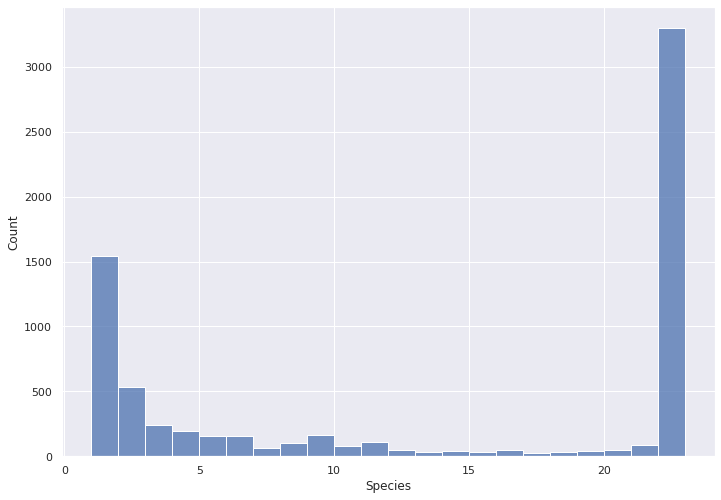

In [ ]:
sns.histplot(data=start_codons2, x="Species", binwidth=1, hue="species")

NaN - paralogs

Dataframe without paralogs:

In [ ]:
start_codons_new = start_codons2[start_codons2['Species'] == start_codons2['Genes']]

In [ ]:
start_codons_new

,ortologus_row,start_codons,ATG,GTG,TTG,Other_codons,Different_same,Number_of_genes,Species,Genes,...,Yers_pseud21.fasta,Yers_pseud22.fasta,Yers_pseud23.fasta,Yers_pseud3.fasta,Yers_pseud4.fasta,Yers_pseud5.fasta,Yers_pseud6.fasta,Yers_pseud7.fasta,Yers_pseud8.fasta,Yers_pseud9.fasta
0,27,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0,23,23,...,DJ40_347_CP008943,YPTB1966_BX936398,YpsIP31758_2113_CP000720,NCTC10217_04171_LR134163,NCTC8480_01841_LR134160,DN756_10980_CP032566,EGX52_18690_CP033715,EGX47_19680_CP033713,EGX44_04100_CP033711,EGX87_13850_CP033707
1,28,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0,23,23,...,DJ40_522_CP008943,YPTB1699_BX936398,YpsIP31758_2294_CP000720,NCTC10217_03981_LR134163,NCTC8480_01650_LR134160,DN756_11855_CP032566,EGX52_18055_CP033715,EGX47_20550_CP033713,EGX44_05050_CP033711,EGX87_14730_CP033707
2,29,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0,23,23,...,DJ40_4223_CP008943,YPTB2349_BX936398,YpsIP31758_1703_CP000720,NCTC10217_00388_LR134163,NCTC8480_02242_LR134160,DN756_08885_CP032566,EGX52_21160_CP033715,EGX47_17555_CP033713,EGX44_01565_CP033711,EGX87_11750_CP033707
3,30,"[ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ATG, ...",23.0,0.0,0.0,0.0,same,23.0,23,23,...,DJ40_2341_CP008943,YPTB0082_BX936398,YpsIP31758_0097_CP000720,NCTC10217_01946_LR134163,NCTC8480_04054_LR134160,DN756_20865_CP032566,EGX52_07815_CP033715,EGX47_08150_CP033713,EGX44_14310_CP033711,EGX87_01660_CP033707
4,31,"[TTG, ATG, ATG, ATG, ATG, TTG, TTG, TTG, TTG, ...",6.0,0.0,17.0,0.0,different,23.0,23,23,...,DJ40_679_CP008943,YPTB1533_BX936398,YpsIP31758_2456_CP000720,NCTC10217_03787_LR134163,NCTC8480_01447_LR134160,DN756_12675_CP032566,EGX52_17230_CP033715,EGX47_21585_CP033713,EGX44_05990_CP033711,EGX87_15555_CP033707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6824,7068,[TTG],0.0,0.0,1.0,0.0,same,1.0,1,1,...,*,*,*,*,*,*,*,*,*,*
6825,7069,[GTG],0.0,1.0,0.0,0.0,same,1.0,1,1,...,*,*,*,*,*,*,*,*,*,*
6826,7070,[TTG],0.0,0.0,1.0,0.0,same,1.0,1,1,...,*,*,*,*,*,*,*,*,*,*
6827,7071,[ATG],1.0,0.0,0.0,0.0,same,1.0,1,1,...,*,*,*,*,*,*,*,*,*,*


In [ ]:
ortho_df_full.rename({'ortologus_row': 'Ortologus_row'}, axis=1, inplace=True)

In [ ]:
start_codons2.rename({'ortologus_row': 'Ortologus_row'}, axis=1, inplace=True)

In [ ]:
organism_gene_row = start_codons2[["Species", "Genes", "Ortologus_row", "Different_same", "ATG", "GTG", "TTG", "Other_codons"]]
summary_rows = Yers_pseud_df_full_with_row.merge(organism_gene_row, on="Ortologus_row")

In [ ]:
summary_rows

,ID,Organism,NT_sequence,AA_sequence,Type_of_DNA_source,Type_of_the_gene,Start_codone,Product,P_C_unity,Ortologus_row,Species,Genes,Different_same,ATG,GTG,TTG,Other_codons
0,FOB73_00005,CP044064,TGTTTGGTATTGGTGCTGAAAGTTACACCGTGGGCTCTAACGAGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,TGT,L-rhamnose isomerase,0,936,23,23,different,22.0,0.0,0.0,1.0
1,NCTC10275_03718,LR134373,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,1,936,23,23,different,22.0,0.0,0.0,1.0
2,NCTC3571_04306,LR134306,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,2,936,23,23,different,22.0,0.0,0.0,1.0
3,NCTC10217_02501,LR134163,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFATVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,3,936,23,23,different,22.0,0.0,0.0,1.0
4,NCTC8480_00230,LR134160,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,4,936,23,23,different,22.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91190,YpsIP31758_A0035,CP000718,ATGAATGGATATGAACTAAGACTTTGGCGTAAAGGGCTTTCCTGGG...,MNGYELRLWRKGLSWEQERAAEELGVSRRAYQYYEKNGPPMVVILA...,plasmid,gene,ATG,hypothetical protein,23,6276,1,1,same,1.0,0.0,0.0,0.0
91191,YpsIP31758_A0036,CP000718,ATGTTGGGACGTCAGAAGCAAAAATTGGTGATCAGTGAAACTGACA...,MLGRQKQKLVISETDIDTALAHLRALPYGTPFPMRWDRQHLLNLLH...,plasmid,gene,ATG,hypothetical protein,23,6277,1,1,same,1.0,0.0,0.0,0.0
91192,YpsIP31758_A0037,CP000718,ATGACCTCAAAAGAAAAAAAATCATCGCTAGGACTGGATGCAATTG...,MTSKEKKSSLGLDAIGDLSSLLAGKGPSPTSPIDLDMNLIDEDPNQ...,plasmid,gene,ATG,transcription repressor protein KorB,23,6278,1,1,same,1.0,0.0,0.0,0.0
91193,YpsIP31758_A0038,CP000718,ATGGGTAATGTCCATGAAAAAACGGCTCTCGAAAGCCGAGTTCCAG...,MGNVHEKTALESRVPGSHKRLGCGPTNHRYSKWCLGRGDAASNVCS...,plasmid,gene,ATG,plasmid partition protein,23,6279,1,1,same,1.0,0.0,0.0,0.0


In [ ]:
summary_rows["start_type"] = summary_rows["Start_codone"]
popular = ["ATG", "GTG", "TTG"]
for number in range(len(summary_rows)):
    if summary_rows.iloc[number, 17] not in popular:
        summary_rows.iloc[number, 17] = "Other"
summary_rows

,ID,Organism,NT_sequence,AA_sequence,Type_of_DNA_source,Type_of_the_gene,Start_codone,Product,P_C_unity,Ortologus_row,Species,Genes,Different_same,ATG,GTG,TTG,Other_codons,start_type
0,FOB73_00005,CP044064,TGTTTGGTATTGGTGCTGAAAGTTACACCGTGGGCTCTAACGAGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,TGT,L-rhamnose isomerase,0,936,23,23,different,22.0,0.0,0.0,1.0,Other
1,NCTC10275_03718,LR134373,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,1,936,23,23,different,22.0,0.0,0.0,1.0,ATG
2,NCTC3571_04306,LR134306,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,2,936,23,23,different,22.0,0.0,0.0,1.0,ATG
3,NCTC10217_02501,LR134163,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFATVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,3,936,23,23,different,22.0,0.0,0.0,1.0,ATG
4,NCTC8480_00230,LR134160,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,4,936,23,23,different,22.0,0.0,0.0,1.0,ATG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91190,YpsIP31758_A0035,CP000718,ATGAATGGATATGAACTAAGACTTTGGCGTAAAGGGCTTTCCTGGG...,MNGYELRLWRKGLSWEQERAAEELGVSRRAYQYYEKNGPPMVVILA...,plasmid,gene,ATG,hypothetical protein,23,6276,1,1,same,1.0,0.0,0.0,0.0,ATG
91191,YpsIP31758_A0036,CP000718,ATGTTGGGACGTCAGAAGCAAAAATTGGTGATCAGTGAAACTGACA...,MLGRQKQKLVISETDIDTALAHLRALPYGTPFPMRWDRQHLLNLLH...,plasmid,gene,ATG,hypothetical protein,23,6277,1,1,same,1.0,0.0,0.0,0.0,ATG
91192,YpsIP31758_A0037,CP000718,ATGACCTCAAAAGAAAAAAAATCATCGCTAGGACTGGATGCAATTG...,MTSKEKKSSLGLDAIGDLSSLLAGKGPSPTSPIDLDMNLIDEDPNQ...,plasmid,gene,ATG,transcription repressor protein KorB,23,6278,1,1,same,1.0,0.0,0.0,0.0,ATG
91193,YpsIP31758_A0038,CP000718,ATGGGTAATGTCCATGAAAAAACGGCTCTCGAAAGCCGAGTTCCAG...,MGNVHEKTALESRVPGSHKRLGCGPTNHRYSKWCLGRGDAASNVCS...,plasmid,gene,ATG,plasmid partition protein,23,6279,1,1,same,1.0,0.0,0.0,0.0,ATG


In [ ]:
summary_rows['Organism'].value_counts()

### U-curve

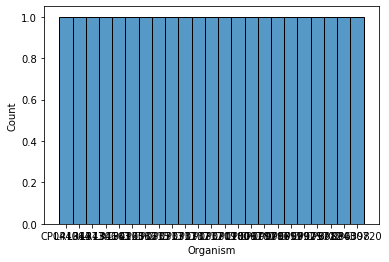

In [ ]:
sns.histplot(data=summary_rows, x="Organism", y = )

In [ ]:
summary_rows.groupby(['Organism'])

In [ ]:
summary_rows['Organism'].value_counts() > 1000

## Core genes with non canonical start codons:

In [ ]:
summary_rows_core = summary_rows[(summary_rows['Species'] == 23) & (summary_rows['Genes'] == 23)]

In [ ]:
summary_rows_core

,ID,Organism,NT_sequence,AA_sequence,Type_of_DNA_source,Type_of_the_gene,Start_codone,Product,P_C_unity,Ortologus_row,Species,Genes,Different_same,ATG,GTG,TTG,Other_codons,start_type
0,FOB73_00005,CP044064,TGTTTGGTATTGGTGCTGAAAGTTACACCGTGGGCTCTAACGAGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,TGT,L-rhamnose isomerase,0,936,23,23,different,22.0,0.0,0.0,1.0,Other
1,NCTC10275_03718,LR134373,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,1,936,23,23,different,22.0,0.0,0.0,1.0,ATG
2,NCTC3571_04306,LR134306,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,2,936,23,23,different,22.0,0.0,0.0,1.0,ATG
3,NCTC10217_02501,LR134163,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFATVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,3,936,23,23,different,22.0,0.0,0.0,1.0,ATG
4,NCTC8480_00230,LR134160,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,4,936,23,23,different,22.0,0.0,0.0,1.0,ATG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76625,BZ21_3753,CP009757,ATGCAAGCTATTCTATCTTCCTGGTTTATTCAGGGAATGATTAAAG...,MQAILSSWFIQGMIKATSDMWHKGWDERNGGNISLRLLAEEVEPYR...,plasmid,gene,ATG,rhamnulose-1-phosphate aldolase,19,1675,23,23,same,23.0,0.0,0.0,0.0,ATG
76626,BZ17_2187,CP009712,ATGCAAGCTATTCTATCTTCCTGGTTTATTCAGGGAATGATTAAAG...,MQAILSSWFIQGMIKATSDMWHKGWDERNGGNISLRLLAEEVEPYR...,plasmid,gene,ATG,rhamnulose-1-phosphate aldolase,20,1675,23,23,same,23.0,0.0,0.0,0.0,ATG
76627,DJ40_2026,CP008943,ATGCAAGCTATTCTATCTTCCTGGTTTATTCAGGGAATGATTAAAG...,MQAILSSWFIQGMIKATSDMWHKGWDERNGGNISLRLLAEEVEPYR...,plasmid,gene,ATG,rhamnulose-1-phosphate aldolase,21,1675,23,23,same,23.0,0.0,0.0,0.0,ATG
76628,YPTB0383,BX936398,ATGCAAGCTATTCTATCTTCCTGGTTTATTCAGGGAATGATTAAAG...,MQAILSSWFIQGMIKATSDMWHKGWDERNGGNISLRLLAEEVEPYR...,plasmid,gene,ATG,rhamnulose-1-phosphate aldolase,22,1675,23,23,same,23.0,0.0,0.0,0.0,ATG


In [ ]:
summary_rows_core[summary_rows_core['start_type'] == 'Other']['Product'].value_counts()

translation initiation factor IF-3                                    11
anaerobic ribonucleoside-triphosphate reductase-activating protein     9
DNA uptake porin HofQ                                                  9
two-component system response regulator KdpE                           9
two-component system sensor histidine kinase BaeS                      9
D-ribose ABC transporter substrate-binding protein                     7
envelope stress response activation lipoprotein NlpE                   7
heme utilization cystosolic carrier protein HutX                       6
polynucleotide adenylyltransferase PcnB                                6
polynucleotide adenylyltransferase                                     3
hypothetical protein                                                   3
ATP-dependent helicase HrpB                                            2
ABC transporter substrate-binding protein                              1
cellulase                                          

## Other

In [ ]:
# start_and_row = Yers_pseud_df_full_with_row[["Start_codone", "Ortologus_row"]]
# strain_gene_row = ortho_df_new[["Species", "Genes", "Ortologus_row"]]
# summary_rows = start_and_row.merge(strain_gene_row, on="Ortologus_row")

# summary_rows["start_type"] = summary_rows["Start_codone"]
# popular = ["ATG", "GTG", "TTG"]
# for number in range(len(summary_rows)):
#     if summary_rows.iloc[number, 4] not in popular:
#         summary_rows.iloc[number, 4] = "Other"
# summary_rows

,Start_codone,Ortologus_row,Species,Genes,start_type
0,TGT,67,23,23,Other
1,ATG,67,23,23,ATG
2,ATG,67,23,23,ATG
3,ATG,67,23,23,ATG
4,ATG,67,23,23,ATG
...,...,...,...,...,...
89688,ATG,4915,2,2,ATG
89689,ATG,4916,2,2,ATG
89690,ATG,4916,2,2,ATG
89691,ATG,4917,2,2,ATG


In [ ]:
summary_rows

## Distribution of three gene groups (100%, 30-70%, singletone)

In [ ]:
import math

In [ ]:
maximum = summary_rows.Species.max()
medium_lower = int(maximum*0.3)
medium_upper = math.ceil(maximum*0.7)
summary_rows["Gene_type"] = "NA"
for number in range(len(summary_rows)):
    if summary_rows.iloc[number, 11] == 1:
        summary_rows.iloc[number, 18] = "cloud"
    elif summary_rows.iloc[number, 11] == maximum:
        summary_rows.iloc[number, 18] = "core"
    elif summary_rows.iloc[number, 11] >= medium_lower and summary_rows.iloc[number, 11] <= medium_upper:
        summary_rows.iloc[number, 18] = "shell"
summary_rows

,ID,Organism,NT_sequence,AA_sequence,Type_of_DNA_source,Type_of_the_gene,Start_codone,Product,P_C_unity,Ortologus_row,Species,Genes,Different_same,ATG,GTG,TTG,Other_codons,start_type,Gene_type
0,FOB73_00005,CP044064,TGTTTGGTATTGGTGCTGAAAGTTACACCGTGGGCTCTAACGAGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,TGT,L-rhamnose isomerase,0,936,23,23,different,22.0,0.0,0.0,1.0,Other,core
1,NCTC10275_03718,LR134373,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,1,936,23,23,different,22.0,0.0,0.0,1.0,ATG,core
2,NCTC3571_04306,LR134306,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,2,936,23,23,different,22.0,0.0,0.0,1.0,ATG,core
3,NCTC10217_02501,LR134163,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFATVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,3,936,23,23,different,22.0,0.0,0.0,1.0,ATG,core
4,NCTC8480_00230,LR134160,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,4,936,23,23,different,22.0,0.0,0.0,1.0,ATG,core
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91190,YpsIP31758_A0035,CP000718,ATGAATGGATATGAACTAAGACTTTGGCGTAAAGGGCTTTCCTGGG...,MNGYELRLWRKGLSWEQERAAEELGVSRRAYQYYEKNGPPMVVILA...,plasmid,gene,ATG,hypothetical protein,23,6276,1,1,same,1.0,0.0,0.0,0.0,ATG,cloud
91191,YpsIP31758_A0036,CP000718,ATGTTGGGACGTCAGAAGCAAAAATTGGTGATCAGTGAAACTGACA...,MLGRQKQKLVISETDIDTALAHLRALPYGTPFPMRWDRQHLLNLLH...,plasmid,gene,ATG,hypothetical protein,23,6277,1,1,same,1.0,0.0,0.0,0.0,ATG,cloud
91192,YpsIP31758_A0037,CP000718,ATGACCTCAAAAGAAAAAAAATCATCGCTAGGACTGGATGCAATTG...,MTSKEKKSSLGLDAIGDLSSLLAGKGPSPTSPIDLDMNLIDEDPNQ...,plasmid,gene,ATG,transcription repressor protein KorB,23,6278,1,1,same,1.0,0.0,0.0,0.0,ATG,cloud
91193,YpsIP31758_A0038,CP000718,ATGGGTAATGTCCATGAAAAAACGGCTCTCGAAAGCCGAGTTCCAG...,MGNVHEKTALESRVPGSHKRLGCGPTNHRYSKWCLGRGDAASNVCS...,plasmid,gene,ATG,plasmid partition protein,23,6279,1,1,same,1.0,0.0,0.0,0.0,ATG,cloud


In [ ]:
summary_rows['Gene_type'].value_counts()

core     68103
NA       13519
shell     8071
cloud     1502
Name: Gene_type, dtype: int64

In [ ]:
summary_rows[summary_rows['Gene_type'] == 'core']

,ID,Organism,NT_sequence,AA_sequence,Type_of_DNA_source,Type_of_the_gene,Start_codone,Product,P_C_unity,Ortologus_row,Species,Genes,Different_same,ATG,GTG,TTG,Other_codons,start_type,Gene_type
0,FOB73_00005,CP044064,TGTTTGGTATTGGTGCTGAAAGTTACACCGTGGGCTCTAACGAGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,TGT,L-rhamnose isomerase,0,936,23,23,different,22.0,0.0,0.0,1.0,Other,core
1,NCTC10275_03718,LR134373,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,1,936,23,23,different,22.0,0.0,0.0,1.0,ATG,core
2,NCTC3571_04306,LR134306,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,2,936,23,23,different,22.0,0.0,0.0,1.0,ATG,core
3,NCTC10217_02501,LR134163,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFATVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,3,936,23,23,different,22.0,0.0,0.0,1.0,ATG,core
4,NCTC8480_00230,LR134160,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,4,936,23,23,different,22.0,0.0,0.0,1.0,ATG,core
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76625,BZ21_3753,CP009757,ATGCAAGCTATTCTATCTTCCTGGTTTATTCAGGGAATGATTAAAG...,MQAILSSWFIQGMIKATSDMWHKGWDERNGGNISLRLLAEEVEPYR...,plasmid,gene,ATG,rhamnulose-1-phosphate aldolase,19,1675,23,23,same,23.0,0.0,0.0,0.0,ATG,core
76626,BZ17_2187,CP009712,ATGCAAGCTATTCTATCTTCCTGGTTTATTCAGGGAATGATTAAAG...,MQAILSSWFIQGMIKATSDMWHKGWDERNGGNISLRLLAEEVEPYR...,plasmid,gene,ATG,rhamnulose-1-phosphate aldolase,20,1675,23,23,same,23.0,0.0,0.0,0.0,ATG,core
76627,DJ40_2026,CP008943,ATGCAAGCTATTCTATCTTCCTGGTTTATTCAGGGAATGATTAAAG...,MQAILSSWFIQGMIKATSDMWHKGWDERNGGNISLRLLAEEVEPYR...,plasmid,gene,ATG,rhamnulose-1-phosphate aldolase,21,1675,23,23,same,23.0,0.0,0.0,0.0,ATG,core
76628,YPTB0383,BX936398,ATGCAAGCTATTCTATCTTCCTGGTTTATTCAGGGAATGATTAAAG...,MQAILSSWFIQGMIKATSDMWHKGWDERNGGNISLRLLAEEVEPYR...,plasmid,gene,ATG,rhamnulose-1-phosphate aldolase,22,1675,23,23,same,23.0,0.0,0.0,0.0,ATG,core


In [ ]:
dist = summary_rows.pivot_table(index="start_type", columns="Gene_type", values="Ortologus_row", aggfunc="count").reset_index()
dist

Gene_type,start_type,NA,cloud,core,shell
0,ATG,11975,1152,60624,6412
1,GTG,990,174,5374,933
2,Other,104,12,95,167
3,TTG,450,164,2010,559


#### Core genes

In [ ]:
import seaborn as sns

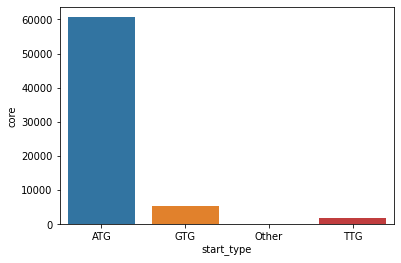

In [ ]:
sns.barplot(data=dist, x="start_type", y="core");

#### Shell genes

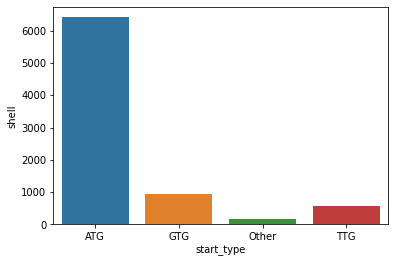

In [ ]:
sns.barplot(data=dist, x="start_type", y="shell");

#### Cloud genes

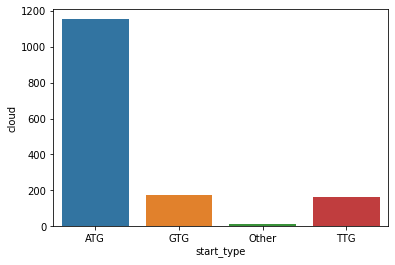

In [ ]:
sns.barplot(data=dist, x="start_type", y="cloud");

## Boxplots

In [ ]:
sns.boxplot(data=summary_rows, x="start_type", y="Species");

## Multiple alignment (Muscle)

In [ ]:
summary_rows

,ID,Organism,NT_sequence,AA_sequence,Type_of_DNA_source,Type_of_the_gene,Start_codone,Product,P_C_unity,Ortologus_row,Species,Genes,Different_same,ATG,GTG,TTG,Other_codons,start_type,Gene_type
0,FOB73_00005,CP044064,TGTTTGGTATTGGTGCTGAAAGTTACACCGTGGGCTCTAACGAGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,TGT,L-rhamnose isomerase,0,67,23,23,different,22.0,0.0,0.0,1.0,Other,core
1,NCTC10275_03718,LR134373,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,1,67,23,23,different,22.0,0.0,0.0,1.0,ATG,core
2,NCTC3571_04306,LR134306,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,2,67,23,23,different,22.0,0.0,0.0,1.0,ATG,core
3,NCTC10217_02501,LR134163,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFATVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,3,67,23,23,different,22.0,0.0,0.0,1.0,ATG,core
4,NCTC8480_00230,LR134160,ATGACGAACTCTATTGAACAGGCCTGGGATCTGGCTAAACAGCGTT...,MTNSIEQAWDLAKQRFAAVGVDVDAALTRLDTLPVSMHCWQGDDVT...,chromosome,gene,ATG,L-rhamnose isomerase,4,67,23,23,different,22.0,0.0,0.0,1.0,ATG,core
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89688,YpsIP31758_3109,CP000720,ATGTCACGTCATAGCATTCCAGCTAATGAGGGATTTTCTGGGCATA...,MSRHSIPANEGFSGHNPPEHQIRRIQTKNLLPAILADNVGEIVAFR...,plasmid,gene,ATG,hypothetical protein,23,4915,2,2,same,2.0,0.0,0.0,0.0,ATG,NA
89689,YPTB2788,BX936398,ATGACGGTTTGCGGTGTACCACTAACGTTGGATGTTCATTGGCCAG...,MTVCGVPLTLDVHWPVKVGDFIADNLEIDGSIDLVNQMMLRRQLFK...,plasmid,gene,ATG,hypothetical protein,22,4916,2,2,same,2.0,0.0,0.0,0.0,ATG,NA
89690,YpsIP31758_1241,CP000720,ATGACGGTTTGCGGTGTACCACTAACGTTGGATGTTCATTGGCCAG...,MTVCGVPLTLDVHWPVKVGDFIADNLEIDGSIDLVNQMMLRRQLFK...,plasmid,gene,ATG,hypothetical protein,23,4916,2,2,same,2.0,0.0,0.0,0.0,ATG,NA
89691,YPTB3884,BX936398,ATGTGCGAACTCGATATTTTACACGACTCTCTTTACCAATTCTGCC...,MCELDILHDSLYQFCPELHLKRLNSLTLACHALLDCKTLTLTELGR...,plasmid,gene,ATG,conserved hypothetical protein,22,4917,2,2,same,2.0,0.0,0.0,0.0,ATG,NA


In [ ]:
summary_rows['Gene_type'].value_counts()

core     68103
NA       13519
shell     8071
Name: Gene_type, dtype: int64

In [ ]:
summary_rows['Start_codone'].value_counts()

ATG    79011
GTG     7297
TTG     3019
ATA      139
ATT      122
ATC       54
CTG       42
CTT        2
TGT        1
AGG        1
AGC        1
TTA        1
CCG        1
GAG        1
GCT        1
Name: Start_codone, dtype: int64

Take only ortologus rows with different types of start codons:

In [ ]:
diff_ortho_list = list(set(summary_rows[summary_rows['Different_same'] == 'different']['Ortologus_row']))

In [ ]:
for ortho_row in diff_ortho_list:
    subset = summary_rows.query("Ortologus_row == @ortho_row")
    with open ("drive/MyDrive/Start_Сodons_Project/Yers_pseud_" + str(ortho_row) + ".fasta", "w") as nucleotide_fasta:
        for iloc_number in range(len(subset)):
            nucleotide_fasta.write(">")
            nucleotide_fasta.write(subset.iloc[iloc_number, 0])
            nucleotide_fasta.write("_")
            nucleotide_fasta.write(subset.iloc[iloc_number, 1])
            nucleotide_fasta.write("\n")
            nucleotide_fasta.write(subset.iloc[iloc_number, 2])
            nucleotide_fasta.write("\n")

In [ ]:
for f in $(ls ./*.fasta); do
  muscle -align $f -output ${f%.fasta}.afa;
done

## Prokka

In [ ]:
source_list = []   # Creating list for identyfing the number of every assemblie DNA molecules (chromosome and any plasmids)
name = "C_psittaci"
for rec in gb_records:
    source = rec[1] # Number of assembly
    source_list.append(source) 
    number  = source_list.count(source) # Counting the DNA molecule of assembly
    mask = f"{name}{source}_{number}"
    with open ("/content/sample_data/for_prokka_fasta/" + mask + ".fasta", "w") as for_prokka_fasta:
        for_prokka_fasta.write(">")
        for_prokka_fasta.write(mask)
        for_prokka_fasta.write("\n")
        for_prokka_fasta.write(str(rec[0].seq))
        for_prokka_fasta.write("\n")